<a href="https://colab.research.google.com/github/HeHeHuang/DataScientist/blob/main/SHP_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Influenza Vaccine


In [ ]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np
import pandas as pd
pyplot.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import as Dataframe
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/SHP/SHP_Monthly_v1.xlsx",index_col=0, parse_dates=[0])
df.head()

ADSORBED_TETANUS  ADULT_DIPTHERIA_TETANUS_(SINGLE_DOSE)  \
VisitDate                                                             
2018-01-01              13.0                                    1.0   
2018-02-01              17.0                                    NaN   
2018-03-01              12.0                                    3.0   
2018-04-01              13.0                                    NaN   
2018-05-01              22.0                                    3.0   

            CHICKENPOX_1_DOSE  HPV_VACCINATION_DOSE  IMM_HEP_A_ADULT_1_DOSE  \
VisitDate                                                                     
2018-01-01                704                   288                      69   
2018-02-01                586                   168                      53   
2018-03-01                879                   189                      84   
2018-04-01                879                   154                      75   
2018-05-01                800                   199                      62   

            IMM_HEP_B_BOOSTER  IMM_HEP_B_DOSE  MMR_1_DOSE  \
VisitDate                                                   
2018-01-01                 75             583          26   
2018-02-01                 71             494          34   
2018-03-01                 59             589          39   
2018-04-01                 42             578         178   
2018-05-01                 36             604         269   

            ROTAVIRUS_VACCINATION  TDAP_VACINNATION  \
VisitDate                                             
2018-01-01                   1607                19   
2018-02-01                   1449                38   
2018-03-01                   1645                68   
2018-04-01                   1626                74   
2018-05-01                   1555                34   

            TYPHOID_VACCINE_INJECTABLE  INFLUENZA_QUADRIVALENT  IMM_HEP_A_B  \
VisitDate                                                                     
2018-01-01                        31.0                    3258          153   
2018-02-01                        25.0                    2370          129   
2018-03-01                        39.0                    1744          172   
2018-04-01                        27.0                    2097          179   
2018-05-01                        50.0                    4603          167   

            IMM_PNEUMOCOCCAL  MENINGOCOCCAL_VACCINATION  \
VisitDate                                                 
2018-01-01              4284                        235   
2018-02-01              3582                        295   
2018-03-01              4536                        158   
2018-04-01              4289                        183   
2018-05-01              4344                        124   

            NCIS_DTPA_IPV_HIB_5_IN_1  NCIS_DTPA-IPV-HIB-HEPB_6_IN_1_1_DOSE  
VisitDate                                                                   
2018-01-01                      4214                                   216  
2018-02-01                      3674                                   198  
2018-03-01                      4441                                   264  
2018-04-01                      4297                                   199  
2018-05-01                      4278                                   204

In [ ]:
# Import as Dataframe 
dfw = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/SHP/SHP_Weekly_v1.xlsx", parse_dates=[3])
dfw.head()

Visit_Date_Year  ...  NCIS_-_DTPA-IPV+HIB+HEPB_(6_IN_1)_-_1_DOSE
0             2018  ...                                        49.0
1             2018  ...                                        43.0
2             2018  ...                                        34.0
3             2018  ...                                        63.0
4             2018  ...                                        27.0

[5 rows x 21 columns]

In [ ]:
#dataframe.duplicated(keep = "False")
dfw[dfw.duplicated('Week_of_Year')]

Visit_Date_Year  ...  NCIS_-_DTPA-IPV+HIB+HEPB_(6_IN_1)_-_1_DOSE
5               2018  ...                                        34.0
10              2018  ...                                        28.0
20              2018  ...                                        20.0
25              2018  ...                                        16.0
35              2018  ...                                        24.0
..               ...  ...                                         ...
236             2021  ...                                       182.0
237             2021  ...                                       391.0
238             2021  ...                                       408.0
239             2021  ...                                       367.0
240             2021  ...                                       422.0

[188 rows x 21 columns]

In [ ]:
df_adsorbed = dfw.groupby(['Visit_Date_Year','Week_of_Year'])['ADSORBED_TETANUS'].sum()
df_adsorbed

Visit_Date_Year  Week_of_Year
2018             1               1.0
                 2               1.0
                 3               4.0
                 4               5.0
                 5               5.0
                                ... 
2021             49              0.0
                 50              0.0
                 51              0.0
                 52              0.0
                 53              1.0
Name: ADSORBED_TETANUS, Length: 212, dtype: float64



```
# This is formatted as code
```



dfw.groupby(['Week_of_Year'])['ADSORBED_TETANUS'].sum()

In [ ]:
vaccine_list = df.columns.values.tolist()
print(vaccine_list) 

['ADSORBED_TETANUS', 'ADULT_DIPTHERIA_TETANUS_(SINGLE_DOSE)', 'CHICKENPOX_1_DOSE', 'HPV_VACCINATION_DOSE', 'IMM_HEP_A_ADULT_1_DOSE', 'IMM_HEP_B_BOOSTER', 'IMM_HEP_B_DOSE', 'MMR_1_DOSE', 'ROTAVIRUS_VACCINATION', 'TDAP_VACINNATION', 'TYPHOID_VACCINE_INJECTABLE', 'INFLUENZA_QUADRIVALENT', 'IMM_HEP_A_B', 'IMM_PNEUMOCOCCAL', 'MENINGOCOCCAL_VACCINATION', 'NCIS_DTPA_IPV_HIB_5_IN_1', 'NCIS_DTPA-IPV-HIB-HEPB_6_IN_1_1_DOSE']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-01-01 to 2021-12-01
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ADSORBED_TETANUS                       47 non-null     float64
 1   ADULT_DIPTHERIA_TETANUS_(SINGLE_DOSE)  10 non-null     float64
 2   CHICKENPOX_1_DOSE                      48 non-null     int64  
 3   HPV_VACCINATION_DOSE                   48 non-null     int64  
 4   IMM_HEP_A_ADULT_1_DOSE                 48 non-null     int64  
 5   IMM_HEP_B_BOOSTER                      48 non-null     int64  
 6   IMM_HEP_B_DOSE                         48 non-null     int64  
 7   MMR_1_DOSE                             48 non-null     int64  
 8   ROTAVIRUS_VACCINATION                  48 non-null     int64  
 9   TDAP_VACINNATION                       48 non-null     int64  
 10  TYPHOID_VACCINE_INJECTABLE             45 non-null     f

In [ ]:
series_influenza=df['INFLUENZA_QUADRIVALENT']
series_influenza

VisitDate
2018-01-01    3258
2018-02-01    2370
2018-03-01    1744
2018-04-01    2097
2018-05-01    4603
2018-06-01    3194
2018-07-01    3485
2018-08-01    3855
2018-09-01    3598
2018-10-01    5305
2018-11-01    6650
2018-12-01    4303
2019-01-01    2930
2019-02-01    1065
2019-03-01     399
2019-04-01    2900
2019-05-01    7232
2019-06-01    4947
2019-07-01    4401
2019-08-01    2986
2019-09-01    1989
2019-10-01    5985
2019-11-01    8919
2019-12-01    6323
2020-01-01    5081
2020-02-01    2473
2020-03-01    8067
2020-04-01    6643
2020-05-01    5458
2020-06-01    7314
2020-07-01    5205
2020-08-01    2999
2020-09-01    1960
2020-10-01    6816
2020-11-01    7531
2020-12-01    8892
2021-01-01    7291
2021-02-01    4591
2021-03-01    2650
2021-04-01    2935
2021-05-01    4937
2021-06-01    7337
2021-07-01    6945
2021-08-01    3456
2021-09-01    3326
2021-10-01    5953
2021-11-01    8711
2021-12-01    7765
Name: INFLUENZA_QUADRIVALENT, dtype: int64

In [ ]:
for i in range(len(df.columns.values)):
  series = df.iloc[:,i]
  print(df.columns[i])
  print(i)


ADSORBED_TETANUS
0
ADULT_DIPTHERIA_TETANUS_(SINGLE_DOSE)
1
CHICKENPOX_1_DOSE
2
HPV_VACCINATION_DOSE
3
IMM_HEP_A_ADULT_1_DOSE
4
IMM_HEP_B_BOOSTER
5
IMM_HEP_B_DOSE
6
MMR_1_DOSE
7
ROTAVIRUS_VACCINATION
8
TDAP_VACINNATION
9
TYPHOID_VACCINE_INJECTABLE
10
INFLUENZA_QUADRIVALENT
11
IMM_HEP_A_B
12
IMM_PNEUMOCOCCAL
13
MENINGOCOCCAL_VACCINATION
14
NCIS_DTPA_IPV_HIB_5_IN_1
15
NCIS_DTPA-IPV-HIB-HEPB_6_IN_1_1_DOSE
16


In [ ]:
series = df.iloc[:,1]
series.name
ADULT_DIPTHERIA_TETANUS = series

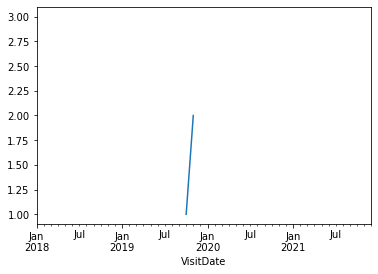

In [ ]:
ADULT_DIPTHERIA_TETANUS.plot()

In [ ]:
series_influenza

Visit Date
2018-01-01    3258
2018-02-01    2370
2018-03-01    1744
2018-04-01    2097
2018-05-01    4603
2018-06-01    3194
2018-07-01    3485
2018-08-01    3855
2018-09-01    3598
2018-10-01    5305
2018-11-01    6650
2018-12-01    4303
2019-01-01    2930
2019-02-01    1065
2019-03-01     399
2019-04-01    2900
2019-05-01    7232
2019-06-01    4947
2019-07-01    4401
2019-08-01    2986
2019-09-01    1989
2019-10-01    5985
2019-11-01    8919
2019-12-01    6323
2020-01-01    5081
2020-02-01    2473
2020-03-01    8067
2020-04-01    6643
2020-05-01    5458
2020-06-01    7314
2020-07-01    5205
2020-08-01    2999
2020-09-01    1960
2020-10-01    6816
2020-11-01    7531
2020-12-01    8892
2021-01-01    7291
2021-02-01    4591
2021-03-01    2650
2021-04-01    2935
2021-05-01    4937
2021-06-01    7337
2021-07-01    6945
2021-08-01    3456
2021-09-01    3326
2021-10-01    5953
2021-11-01    8711
2021-12-01    7765
Name: INFLUENZA (QUADRIVALENT), dtype: int64

In [ ]:
series_influenza.size

48

In [ ]:
series_influenza['2021']
print(series_influenza.describe())

count      48.000000
mean     4768.208333
std      2234.884127
min       399.000000
25%      2973.250000
50%      4597.000000
75%      6691.500000
max      8919.000000
Name: INFLUENZA (QUADRIVALENT), dtype: float64


##Basic Features engineering


In [ ]:
#basic Feature Engineering
#input features
#time series features
dataframe = pd.DataFrame()
dataframe['year'] = [series_influenza.index[i].year for i in range(len(series_influenza))]
dataframe['month'] = [series_influenza.index[i].month for i in range(len(series_influenza))]
dataframe['influenza'] = [series_influenza[i] for i in range(len(series_influenza))]
[print(dataframe.head(5))]

   year  month  influenza
0  2018      1       3258
1  2018      2       2370
2  2018      3       1744
3  2018      4       2097
4  2018      5       4603


[None]

#### machine learning:  Lag Features shift function -> lag 

In [ ]:
# Lag Features #shift function -> lag 
temps = pd.DataFrame(series_influenza.values)
lag_df= pd.concat([temps.shift(1),temps],axis=1)
lag_df.columns=['t','t+1']
print(lag_df.head())

        t   t+1
0     NaN  3258
1  3258.0  2370
2  2370.0  1744
3  1744.0  2097
4  2097.0  4603


In [ ]:
lag_dfm= pd.concat([temps.shift(3),temps.shift(2),temps.shift(1),temps],axis=1) #axis{0/’index’, 1/’columns’}, default 0
lag_dfm.columns=['t-2','t-1','t','t+1']
print(lag_dfm.head())

      t-2     t-1       t   t+1
0     NaN     NaN     NaN  3258
1     NaN     NaN  3258.0  2370
2     NaN  3258.0  2370.0  1744
3  3258.0  2370.0  1744.0  2097
4  2370.0  1744.0  2097.0  4603


In [ ]:
#rolling window, user previse values to predict 
#1. shifted 
#2. rolling function to calulate the window of two value 
shifted = temps.shift(1)
window = shifted.rolling(window=2)
#print(window)
means = window.mean()
means
rolling_df = pd.concat([means,temps],axis=1)
rolling_df.columns = ['mean(t-1,t)','t+1']
rolling_df.head(5)

mean(t-1,t)   t+1
0          NaN  3258
1          NaN  2370
2       2814.0  1744
3       2057.0  2097
4       1920.5  4603

In [ ]:
#Expending window


##Data visualization


#### line plot

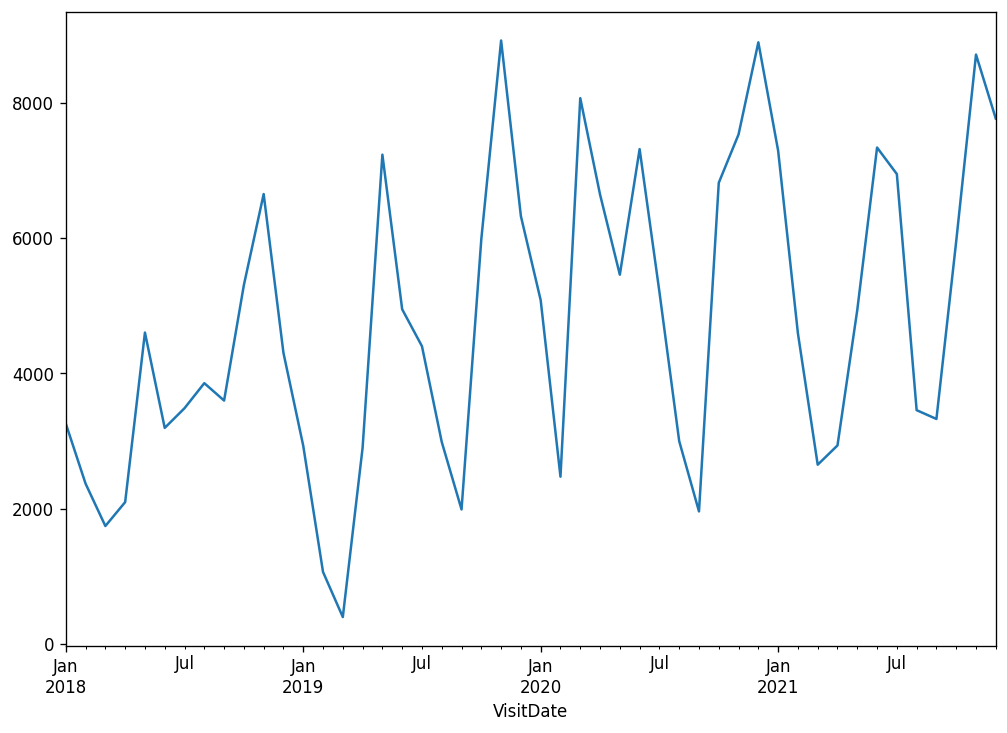

In [ ]:
#Data visualization
from matplotlib import pyplot

series_influenza.plot()
pyplot.show()

#### Histogram and Density plots

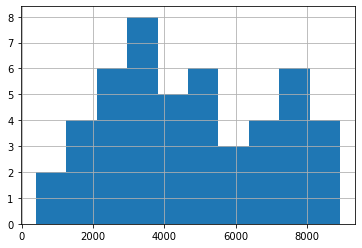

In [ ]:
series_influenza.hist()

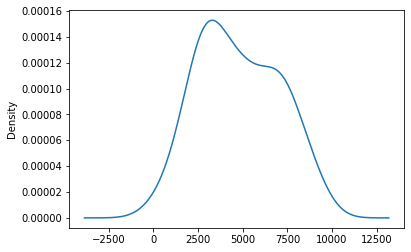

In [ ]:
series_influenza.plot(kind='kde')

#### Box and Whisker Plots by Interval


    2018  2019  2020  2021
0   3258  2930  5081  7291
1   2370  1065  2473  4591
2   1744   399  8067  2650
3   2097  2900  6643  2935
4   4603  7232  5458  4937
5   3194  4947  7314  7337
6   3485  4401  5205  6945
7   3855  2986  2999  3456
8   3598  1989  1960  3326
9   5305  5985  6816  5953
10  6650  8919  7531  8711
11  4303  6323  8892  7765


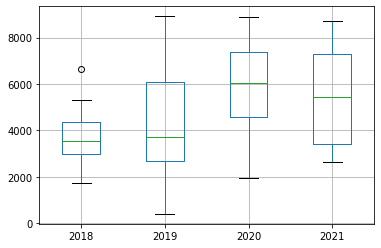

In [ ]:
groups = series_influenza.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year]=group.values
print(years)
years.boxplot()

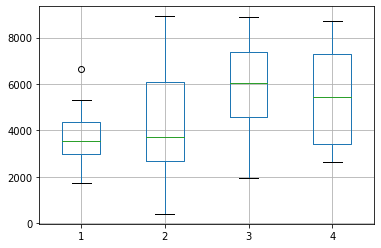

In [ ]:
#monthly box plot     ??? 
one_year = series_influenza['2021']
groups_2021 = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat ([pd.DataFrame(x[1].values) for x in groups],axis=1)
months = pd.DataFrame(months)
months.columns = range(1,5)
months.boxplot()


#### Lag Scatter Plots

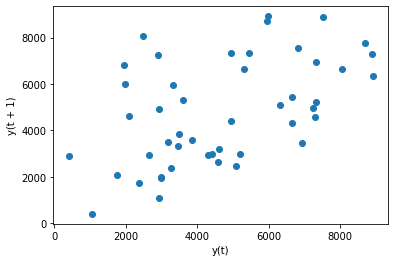

In [ ]:
from pandas.plotting import lag_plot
lag_plot(series_influenza)

#### multiple lag scatter plots

<function matplotlib.pyplot.show>

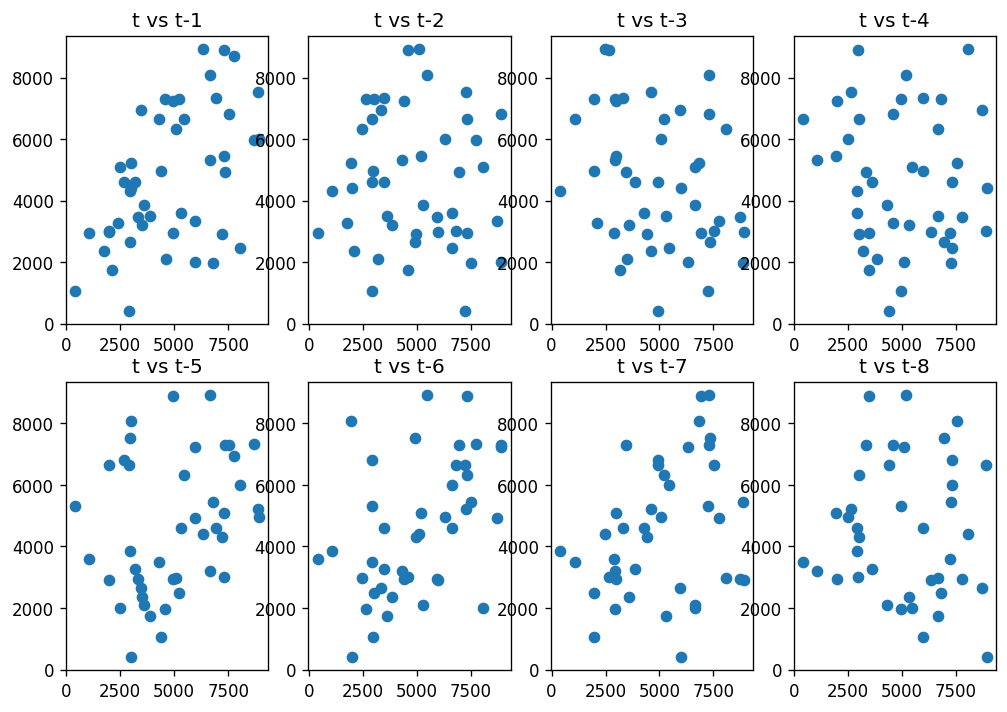

In [ ]:
values = pd.DataFrame(series_influenza)
lags = 8
columns = [values]   # list contain df
for i in range(1,(lags+1)):
 columns.append(values.shift(i))
dataframe = pd.concat(columns,axis=1)
columns_name = ['t']
for i in range(1,(lags+1)):
  columns_name.append('t-' + str(i))
dataframe.columns=columns_name
pyplot.figure(1)
for i in range(1,(lags+1)):
  ax = pyplot.subplot(240 +i)
  ax.set_title('t vs t-' + str(i))
  pyplot.scatter(x=dataframe['t'].values, y = dataframe['t-'+str(i)].values)
pyplot.show

#

#### Autocorrelation Plots

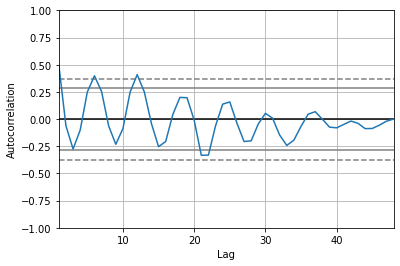

In [ ]:
pd.plotting.autocorrelation_plot(series_influenza)


## Resampling and interpolation


> if wrong frequency , upsampling/downsampling


## Power Transforms


> Data transforms are intended to remove noise and improve the signal in time series forecasting


*   square root transform
*   log transform
*   Box-Cox transform





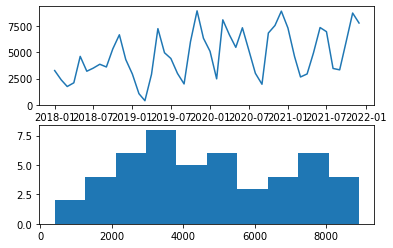

In [ ]:
pyplot.subplot(211) # 211 is equivalent to nrows=2, ncols=1, plot_number=1.
pyplot.plot(series_influenza)
pyplot.subplot(212)
pyplot.hist(series_influenza)
pyplot.show()

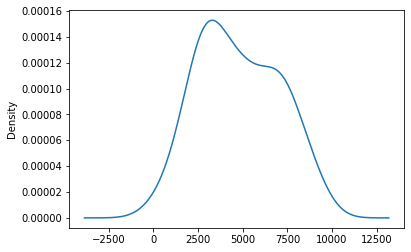

In [ ]:
series_influenza.plot(kind='kde')

#### square root transform


> time series has a quadratic growth trend, and histogram of values whow an exponental distribution with a long tail



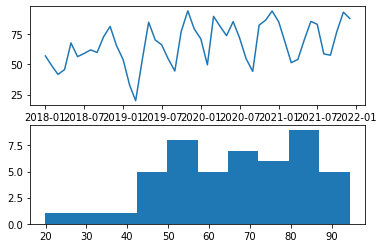

In [ ]:
series_influenza_sqrt = np.sqrt(series_influenza)
pyplot.subplot(211) # 211 is equivalent to nrows=2, ncols=1, plot_number=1.
pyplot.plot(series_influenza_sqrt)
pyplot.subplot(212)
pyplot.hist(series_influenza_sqrt)
pyplot.show()

#### square root transform


> are effective at removing exponential variance




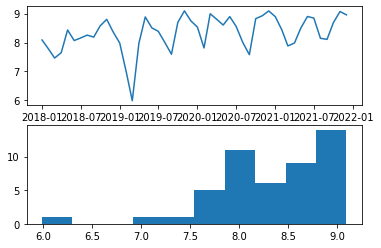

In [ ]:
series_influenza_log = np.log(series_influenza)
pyplot.subplot(211) # 211 is equivalent to nrows=2, ncols=1, plot_number=1.
pyplot.plot(series_influenza_log)
pyplot.subplot(212)
pyplot.hist(series_influenza_log)
pyplot.show()

#### Box-Cox transform


> configurable data transform method that supports both square root and log transform



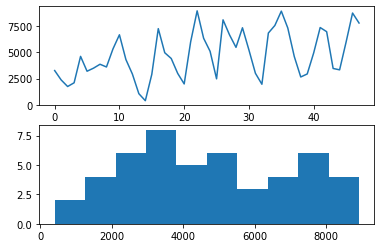

In [ ]:
from scipy.stats import boxcox
series_influenza_boxcox = boxcox(series_influenza,lmbda=1.0)
pyplot.subplot(211) # 211 is equivalent to nrows=2, ncols=1, plot_number=1.
pyplot.plot(series_influenza_boxcox)
pyplot.subplot(212)
pyplot.hist(series_influenza_boxcox)
pyplot.show()

In [ ]:
# 如果我就是要把 time series 变成 linear 要怎么做? 


## Moving Average Smoothing


> propuse: remove the fine-grained variation between time steps, in other words, reduce the random variation in the observations

- Center moving average
- Trailing moving average




#### Center moving average 
window of 3: t-1, t, t+1 


Trailing Moving average 
window of 3: t-2,t-1,t 

#### moving average as data perparation

Visit Date
2018-01-01            NaN
2018-02-01            NaN
2018-03-01    2457.333333
2018-04-01    2070.333333
2018-05-01    2814.666667
2018-06-01    3298.000000
2018-07-01    3760.666667
2018-08-01    3511.333333
2018-09-01    3646.000000
2018-10-01    4252.666667
Name: INFLUENZA (QUADRIVALENT), dtype: float64


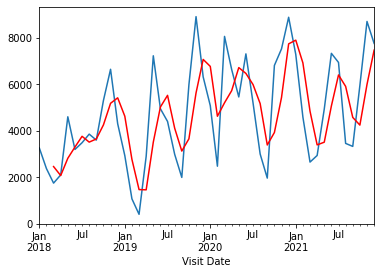

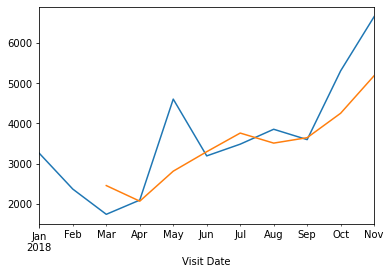

In [ ]:
#Tailing-rolling average transfrom
rolling_influenza = series_influenza.rolling(window=3)
rolling_mean = rolling_influenza.mean()
print(rolling_mean.head(10))
series_influenza.plot()
rolling_mean.plot(color='red')
pyplot.show()
#zoom in one year
series_influenza[:11].plot()
rolling_mean[:11].plot()
pyplot.show()

#### moving average as Feature Engineering

#### moving average as prediction


predicted t0 =2367.250000 ,expected=4603.000000
predicted t1 =2703.500000 ,expected=3194.000000
predicted t2 =2909.500000 ,expected=3485.000000
predicted t3 =3344.750000 ,expected=3855.000000
predicted t4 =3784.250000 ,expected=3598.000000
predicted t5 =3533.000000 ,expected=5305.000000
predicted t6 =4060.750000 ,expected=6650.000000
predicted t7 =4852.000000 ,expected=4303.000000
predicted t8 =4964.000000 ,expected=2930.000000
predicted t9 =4797.000000 ,expected=1065.000000
predicted t10 =3737.000000 ,expected=399.000000
predicted t11 =2174.250000 ,expected=2900.000000
predicted t12 =1823.500000 ,expected=7232.000000
predicted t13 =2899.000000 ,expected=4947.000000
predicted t14 =3869.500000 ,expected=4401.000000
predicted t15 =4870.000000 ,expected=2986.000000
predicted t16 =4891.500000 ,expected=1989.000000
predicted t17 =3580.750000 ,expected=5985.000000
predicted t18 =3840.250000 ,expected=8919.000000
predicted t19 =4969.750000 ,expected=6323.000000
predicted t20 =5804.000000 ,exp

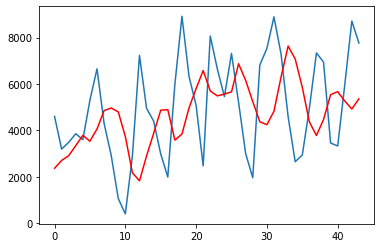

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
X= series_influenza.values
window=4
history = [X[i] for i in range(window)]
test = [X[i] for i in range (window, len(X))]
predictions =list()

for t in range(len(test)):
  length = len(history)
  yhat = np.mean([history[i] for i in range(length-window,length)])
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted t%s =%f ,expected=%f' % (t,yhat,obs))
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE %.3f' % rmse)
#plot 
mpl.pyplot.plot(test)
mpl.pyplot.plot(predictions,color='red')
mpl.pyplot.show()

## Temporal Structure

#### White Noise


> the series of forecast errors should ideally be white noise




In [ ]:
# create Gaussian white noise 
from random import gauss
from random import seed 
from pandas.plotting import autocorrelation_plot

seed(1)
series_gauss = [gauss(0.0,1.0) for i in range(1000)]  # ramdom number which fit the gaussian distribution
series_gauss = pd.Series(series_gauss)
series_gauss
print(series_gauss.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


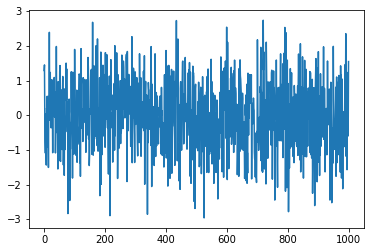

In [ ]:
series_gauss.plot()

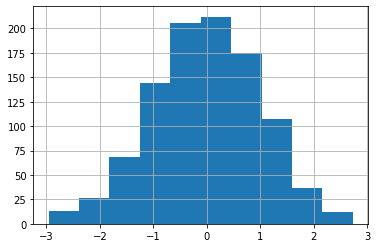

In [ ]:
series_gauss.hist()

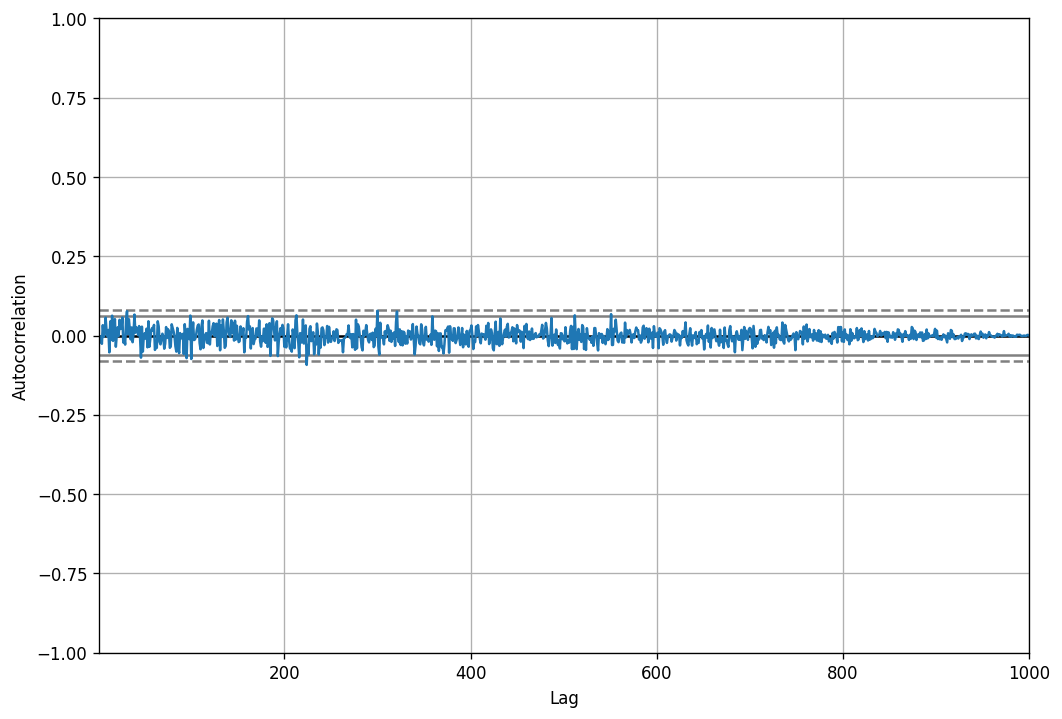

In [ ]:
# autocorreclation plot
autocorrelation_plot(series_gauss)
pyplot.show()

#### Random Walk


> the next value in the sequence is a modification of the previous value in the sequence, but random walk is unpredictable




但还是有疑问, 就是他能不能预测? 


> 答案: 不能预测, 他是random walk 不能被预测. 



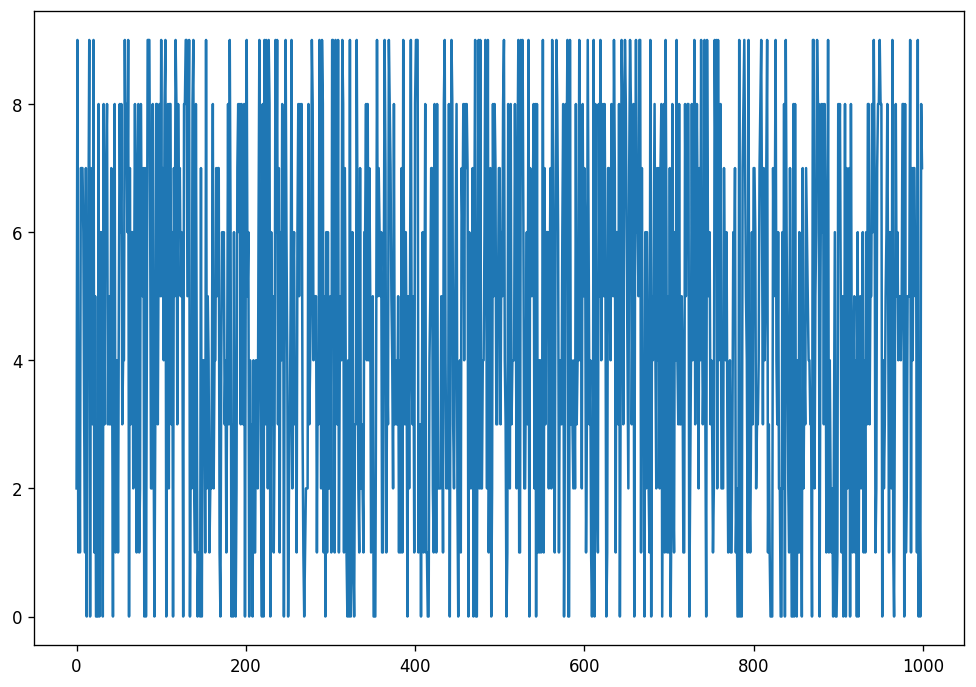

In [ ]:
from random import randrange
seed(1)
series_rw = [randrange(10) for i in range(1000)]
pyplot.plot(series_rw)
pyplot.show() #it is a sequence of ramdom number, it is just white noise not random walk 


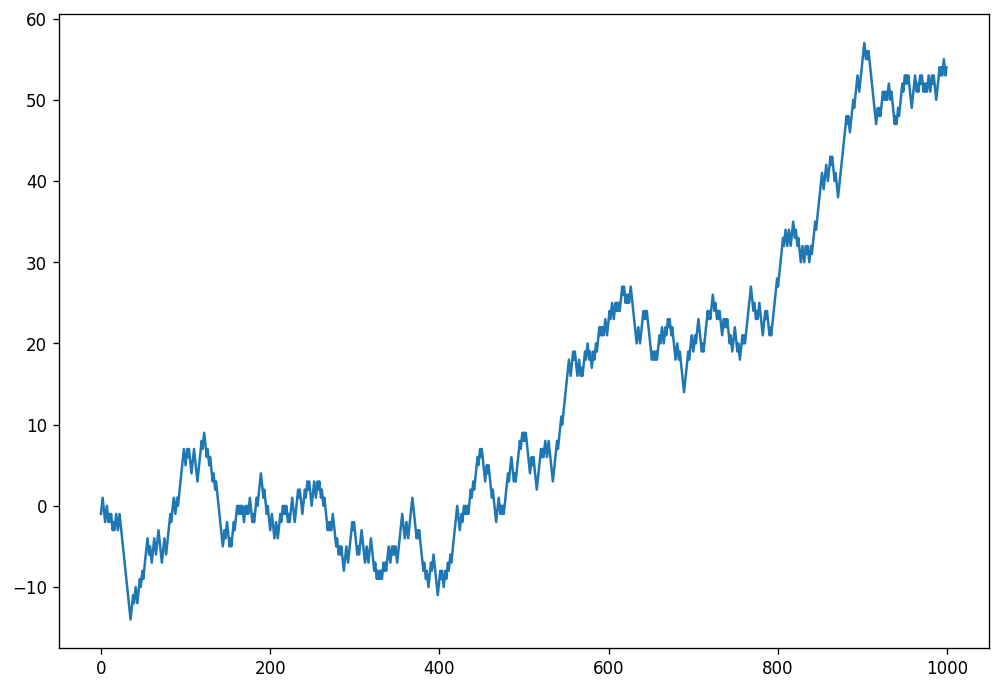

In [ ]:
from random import random
seed(1)
random_walk = list()
random_walk.append(-1 if  random() <0.5 else 1)
for i in range(1,1000):
  movement = -1 if random() < 0.5 else 1 
  value = random_walk[i-1] + movement
  random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

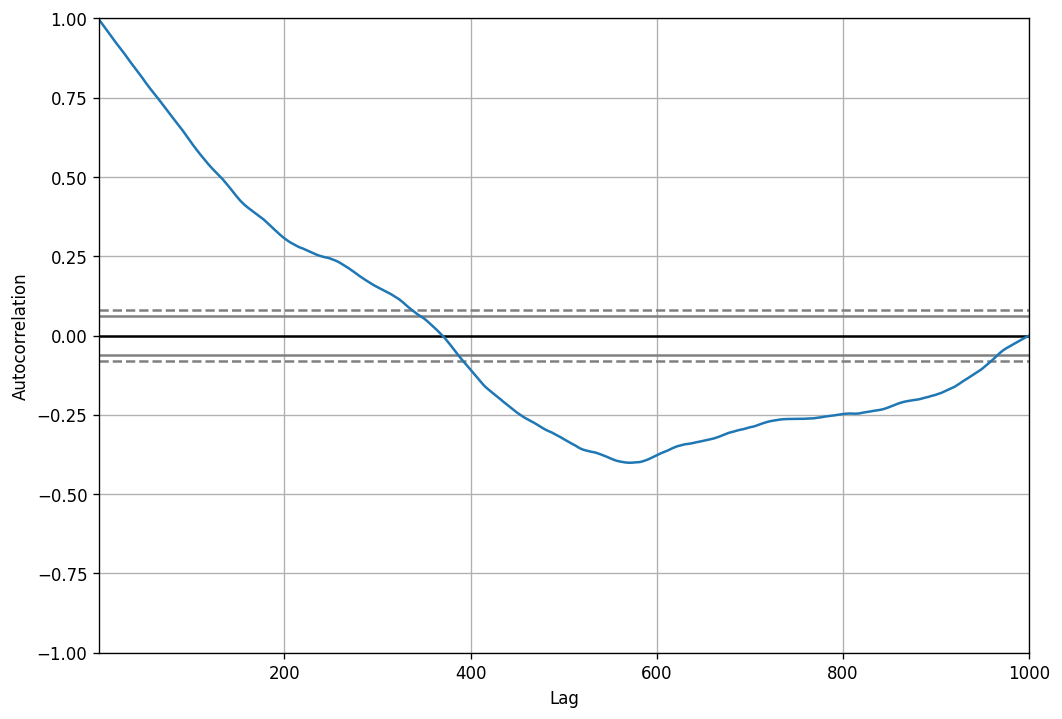

In [ ]:
autocorrelation_plot(random_walk)
pyplot.show()

In [ ]:
# Augmenteddickey-fuller test 
from statsmodels.tsa.stattools import adfuller
result = adfuller(random_walk)
result # ADF , p-value , 1%,5%,10% confidence level 
#null-hppothesis of test is the time series is non-stationary 


(0.34160454935399814,
 0.9791747967918744,
 0,
 999,
 {'1%': -3.4369127451400474,
  '10%': -2.568312754566378,
  '5%': -2.864437475834273},
 2773.394895844241)

In [ ]:
print('ADF is %f' %result[0])
print('p-value is %f' %result[1])
print('Critial value - confidence level')
for key,value in result[4].items():
  print('\t%s: %.3f' %(key,value))

ADF is 0.341605
p-value is 0.979175
Critial value - confidence level
	1%: -3.437
	5%: -2.864
	10%: -2.568


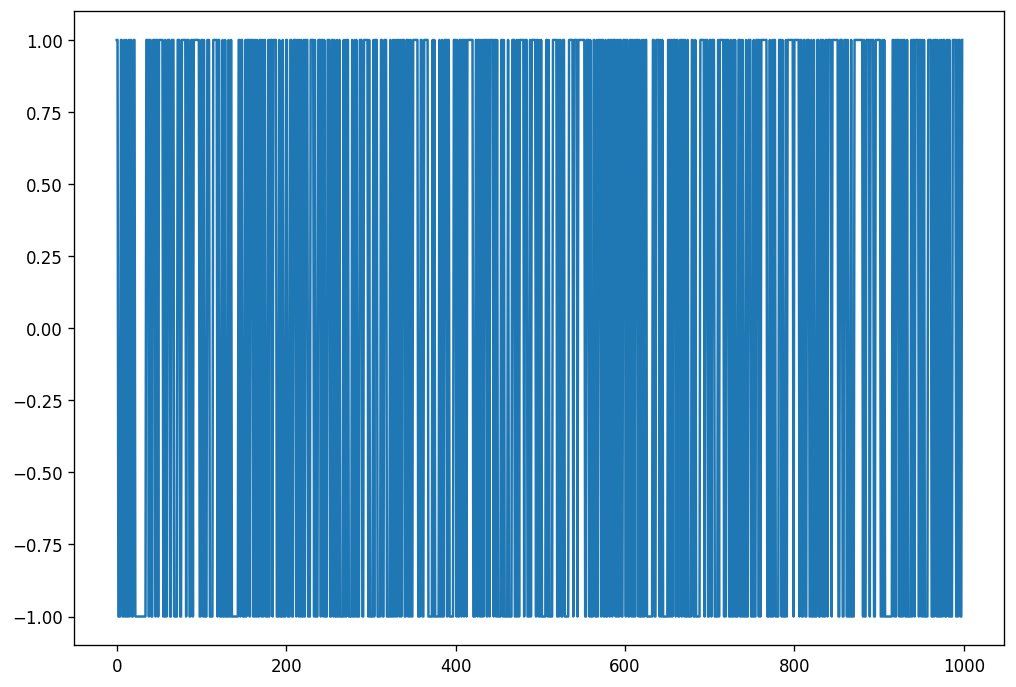

In [ ]:
#take different
diff =list()
for i in range(1,len(random_walk)):
 value = random_walk[i]-random_walk[i-1]
 diff.append(value)
pyplot.plot(diff)
pyplot.show()

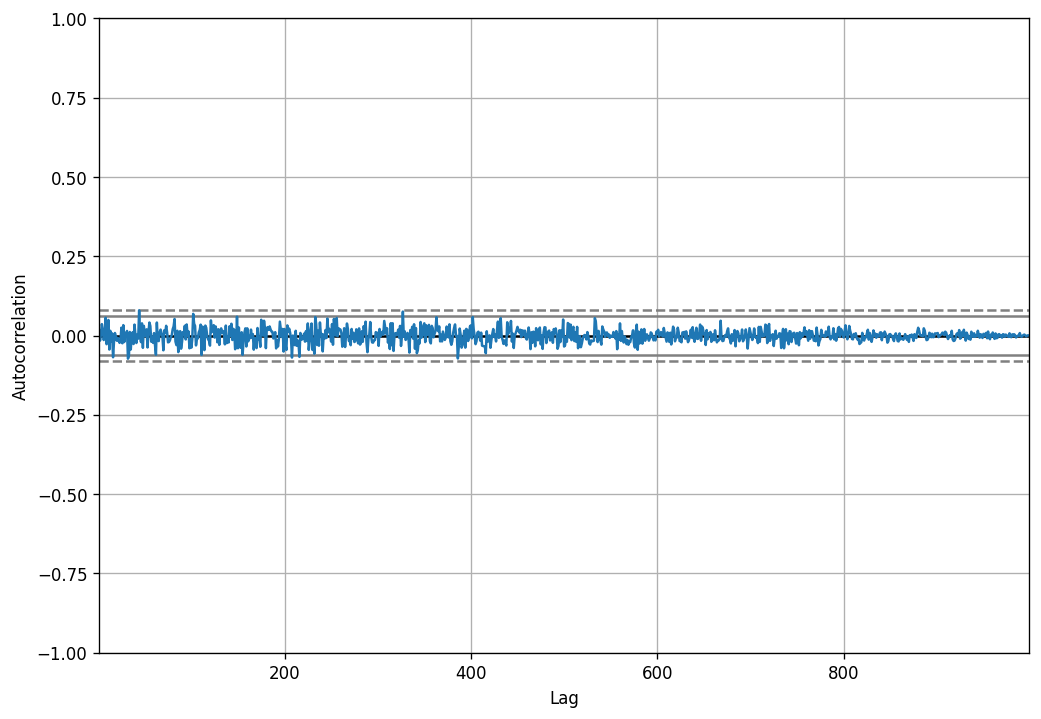

In [ ]:
autocorrelation_plot(diff) # if see from here, after the different, the autocorrelation_plot is like white noise 


## Decomposition



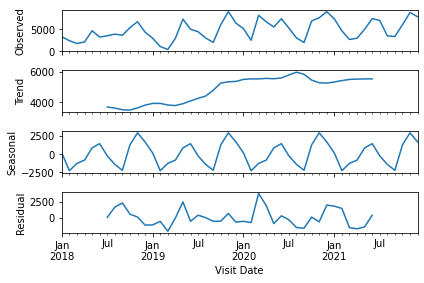

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_influenza,model = 'additive' )
result.plot()
pyplot.show()

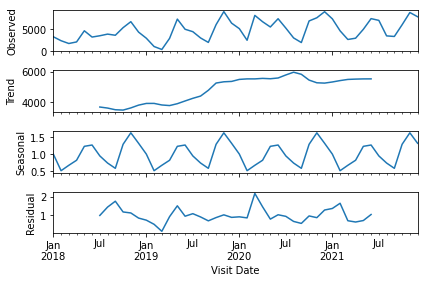

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series_influenza,model = 'multiplicative' )
result.plot()
pyplot.show()

#### Trend


> identify and remove Trend: if trend is linear, one time differencing. if trend is quadratic, a second level of differencing


> general classes:
- Deterministic Trends
- stochastic Trends

> from scope of observation
- Global Trends
- Local Trends





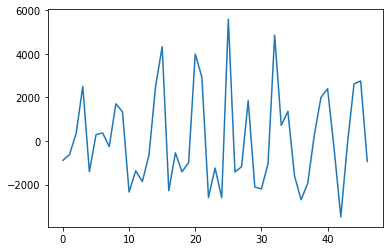

In [ ]:
# Detrend by differencing
diff = list()
for i in range(1,len(series_influenza)):
  value = series_influenza[i]-series_influenza[i-1]
  diff.append(value)
pyplot.plot(diff)
pyplot.show()

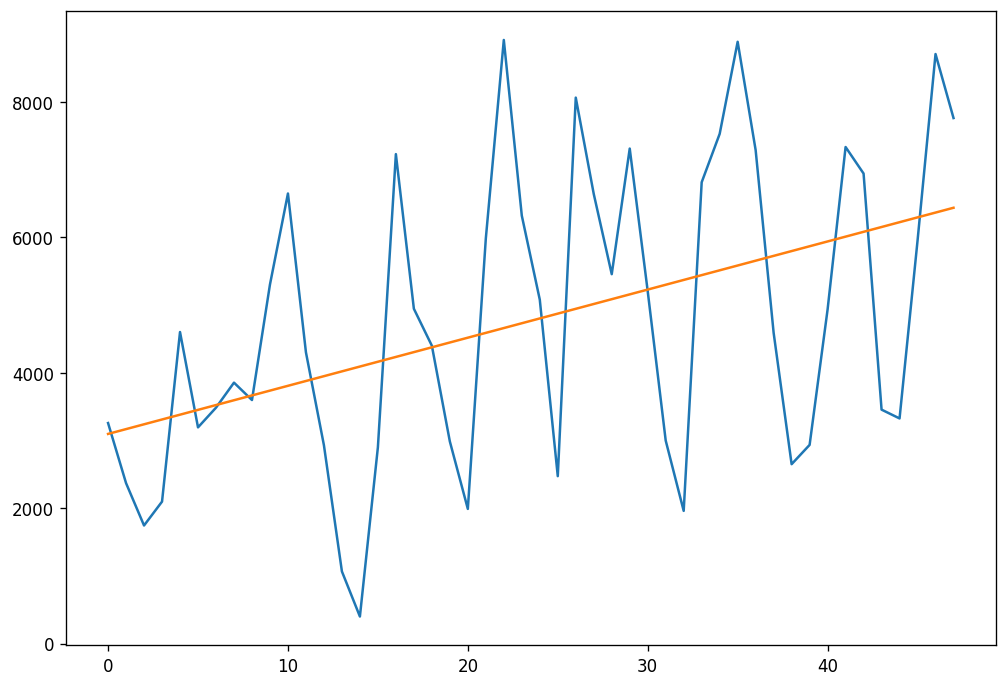

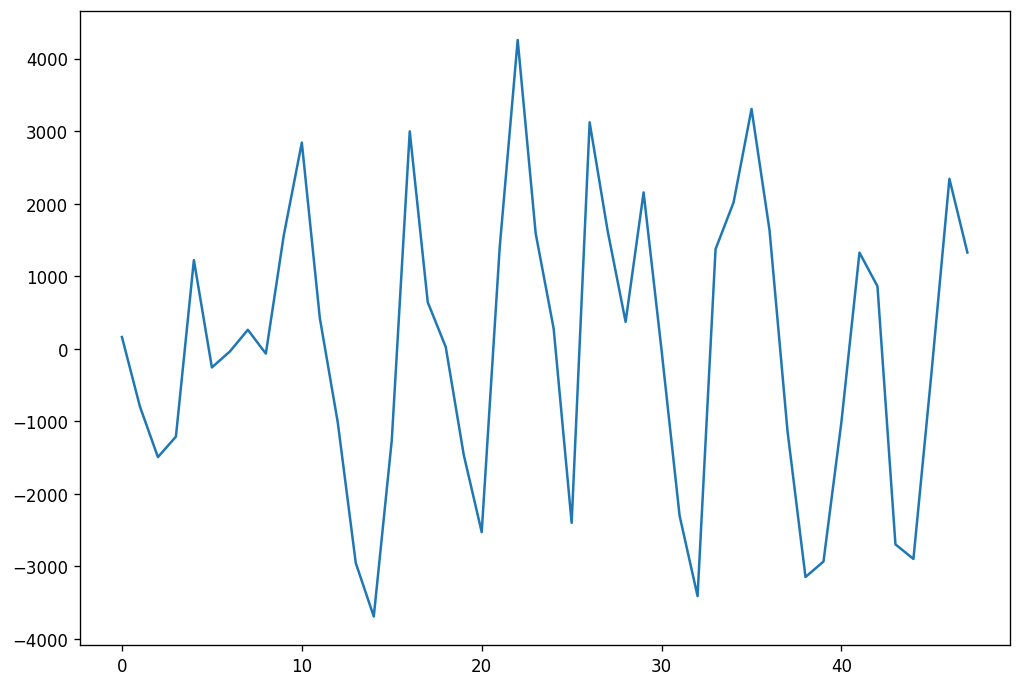

In [ ]:
# Detrend by Model Fitting
from sklearn.linear_model import LinearRegression
import numpy as np
X= [i for i in range (0, len(series_influenza))]
X = np.reshape(X,(len(X),1))
y = series_influenza.values
model = LinearRegression()
model.fit(X,y)
trend = model.predict(X)
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
#detrend
detrended = [y[i]-trend[i] for i in range(0,len(series_influenza))]
pyplot.plot(detrended)
pyplot.show()

#### Seasonality

##### seasonal adjustment / Deseasonalizing



#### Stationarity in Time series Data

## Backetest Forecast Models


#### Train Test split 

In [ ]:
train_size = int(len(series_influenza) * 42/48)
train, test = series_influenza[0:train_size], series_influenza[train_size:len(series_influenza)]
print('Observations:%d' % (len(series_influenza)))
print('Train:%d' % (len(train)))
print('test:%d' % (len(test)))

Observations:48
Train:42
test:6


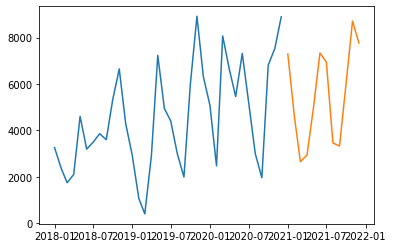

In [ ]:
pyplot.plot(train)
pyplot.plot(test)
pyplot.plot(train+test)
#pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

#### Multiple Train Test 


Observations:48
Train:12
test:12
Observations:48
Train:24
test:12
Observations:48
Train:36
test:12


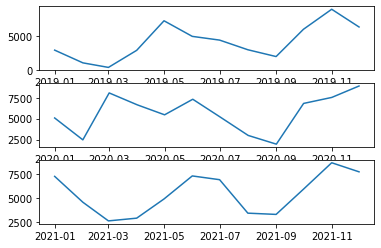

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
X= series_influenza
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index =1
for train_index,test_index in splits.split(X):
  train = X[train_index]
  test = X[test_index]
  print('Observations:%d' % (len(series_influenza)))
  print('Train:%d' % (len(train)))
  print('test:%d' % (len(test)))
  pyplot.subplot(310 + index)
  pyplot.plot(test)
 # pyplot.plot([None for i in train] + [x for x in test])
  index +=1
#test_l = [None for i in train]
#test_l

#### Walk-forward Validation


In [ ]:
n_train = 30
n_records = len(series_influenza)
for i in range(n_train,n_records):
  train,test = series_influenza[0:i],series_influenza[i:i+1]
  print('train=%d, test=%d' %(len(train),len(test)))

train=30, test=1
train=31, test=1
train=32, test=1
train=33, test=1
train=34, test=1
train=35, test=1
train=36, test=1
train=37, test=1
train=38, test=1
train=39, test=1
train=40, test=1
train=41, test=1
train=42, test=1
train=43, test=1
train=44, test=1
train=45, test=1
train=46, test=1
train=47, test=1


## Forecasting Performance Measures


>- forecast Error (residual forecast Error)
- mean forecast erro forecast bias
- mean absolute error
- mean squared error
- root mean squared error



In [ ]:
#forecast Error (residual forecast Error)
expected = [0.0,0.5,0.0,0.5,0.0]
predictions = [0.2,0.4,0.1,0.6,0.2]

forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('forecasting Error %s' %forecast_errors)

forecasting Error [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


In [ ]:
# mean forecast error
bias = sum(forecast_errors)*1.0/len(expected)
print('Bias:%f' %bias)

Bias:-0.100000


In [ ]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected,predictions)
print('MAE: %f' %mae)

MAE: 0.140000


In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(expected,predictions)
print('MSE: %f' %mse) 

MSE: 0.022000


In [ ]:
from math import sqrt
rmse = sqrt(mse)
print('RMSE: %f' %rmse)

RMSE: 0.148324


## Presistence Algorithm Steps
- Transform time series dataset into a supervised learning problem
- Establish train and test dataset
- define the persistence model
- make a forecast and establish a baseline performance 
- review the complete example and plot the output


                 t   t+1
Visit Date              
2018-01-01     NaN  3258
2018-02-01  3258.0  2370
2018-03-01  2370.0  1744
2018-04-01  1744.0  2097
2018-05-01  2097.0  4603
Test RMSE: 2150.438


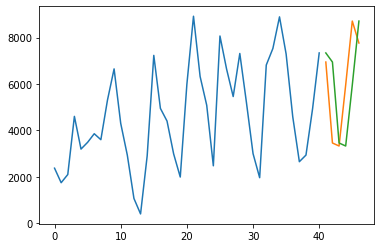

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#step 1 
values = pd.DataFrame(series_influenza)
df_influenza = pd.concat([values.shift(1),values],axis=1)
df_influenza.columns = ['t','t+1']
print(df_influenza.head(5))
#step 2 
X = df_influenza.values
train_size = int(len(X) * 42/48)
train,test = X[1:train_size],X[train_size:]
train_X,train_y = train[:,0],train[:,1]
test_X,test_y = test[:,0],test[:,1]
# step 3: model 
def model_persistence(x):
  return x
#step 4:
predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y,predictions))
print('Test RMSE: %.3f' %rmse)
pyplot.plot(train_y)
pyplot.plot([None for i in train_y]+[x for x in test_y])
pyplot.plot([None for i in train_y]+[x for x in predictions])
pyplot.show()

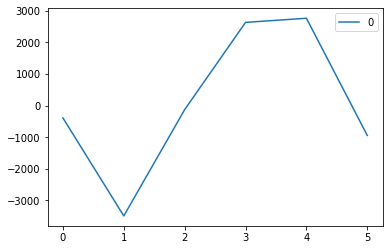

In [ ]:
# residual line plot
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.plot()
                         

In [ ]:
residuals.describe()

0
count     6.000000
mean     71.333333
std    2354.390084
min   -3489.000000
25%    -807.500000
50%    -261.000000
75%    1937.750000
max    2758.000000

#### how to use the residual histogram and density plots to check
we would expect the forecast errors to be normally distributed  around a zero mean.


---
if plot showed a distribution that was non-Gaussian, it would suggest that assumptions made by the modelling process were perhaps incorrect. 
need other method 



---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3672971150>]],
      dtype=object)

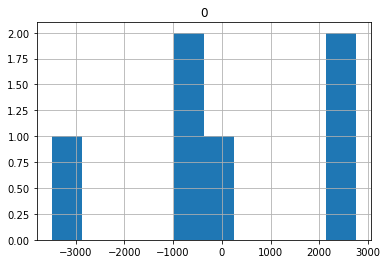

In [ ]:
residuals.hist()

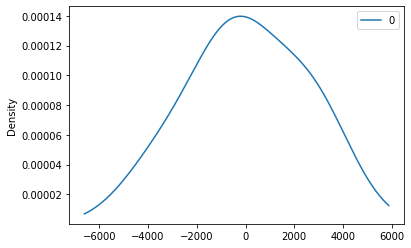

In [ ]:
residuals.plot(kind='kde')

#### QQ plot


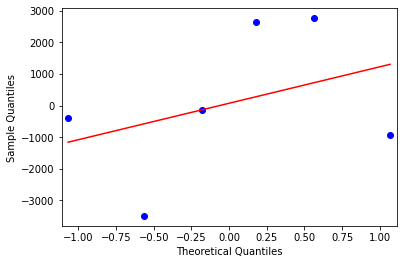

In [ ]:
#quantile plot
from statsmodels.graphics.gofplots import qqplot
rs = np.array(residuals)
rs
qqplot(rs,line='r')
pyplot.show()

#### Residual autocorrelation plot


> Any correlation between the residuals is not expected. --> autocorrelation scores being below the threshold of significance



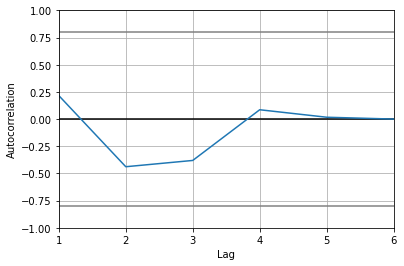

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)

## reframe time series forecasting



## ForeCast Model

#### Autoregression Models for forecasting


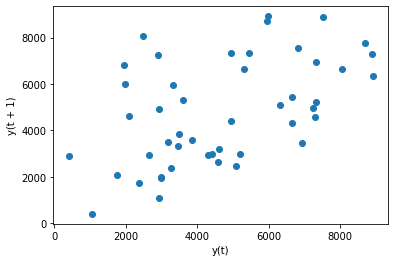

In [ ]:
# quick check Autocorrelation
pd.plotting.lag_plot(series_influenza)
pyplot.show()


In [ ]:
#correlation of lag =1   shift() under pandas
values = pd.DataFrame(series_influenza.values)
dataframe = pd.concat([values.shift(1),values],axis=1)
dataframe.columns = ['t','t+1']
result = dataframe.corr()
print(result)

            t       t+1
t    1.000000  0.510136
t+1  0.510136  1.000000


#### autocorrelation plot

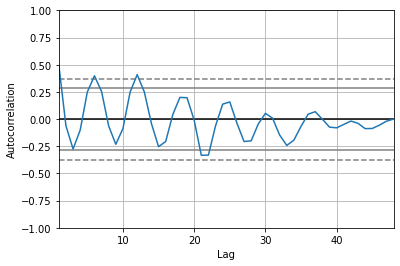

In [ ]:
#autocorrelation plot
# slot lineL: 95% dashed line:99%
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_influenza)
pyplot.show()

#### ACF 



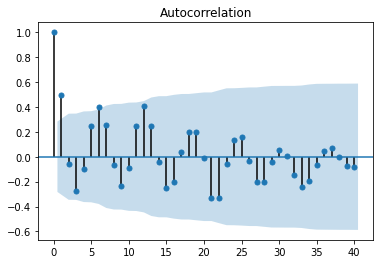

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series_influenza,lags=40)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


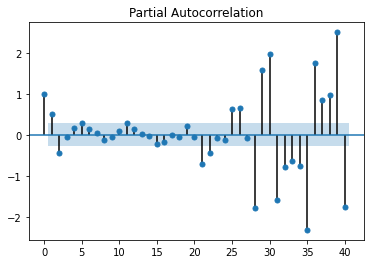

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series_influenza,lags=40)
pyplot.show()

#### use autoregression model to predict


Lag: 10
coefficients: [ 2.05438015e+03  4.65608546e-01 -2.07068743e-01 -1.18298102e-01
 -5.48906675e-02  1.19701801e-01  1.61430948e-01  2.01238337e-01
 -7.81902443e-03 -7.11883404e-02  1.14572165e-01]
predicted=7151.998412,expected=6945.000000
predicted=5820.852212,expected=3456.000000
predicted=4020.544708,expected=3326.000000
predicted=3534.156482,expected=5953.000000
predicted=4539.881525,expected=8711.000000
predicted=5989.683667,expected=7765.000000
Test RMSE:2328.037


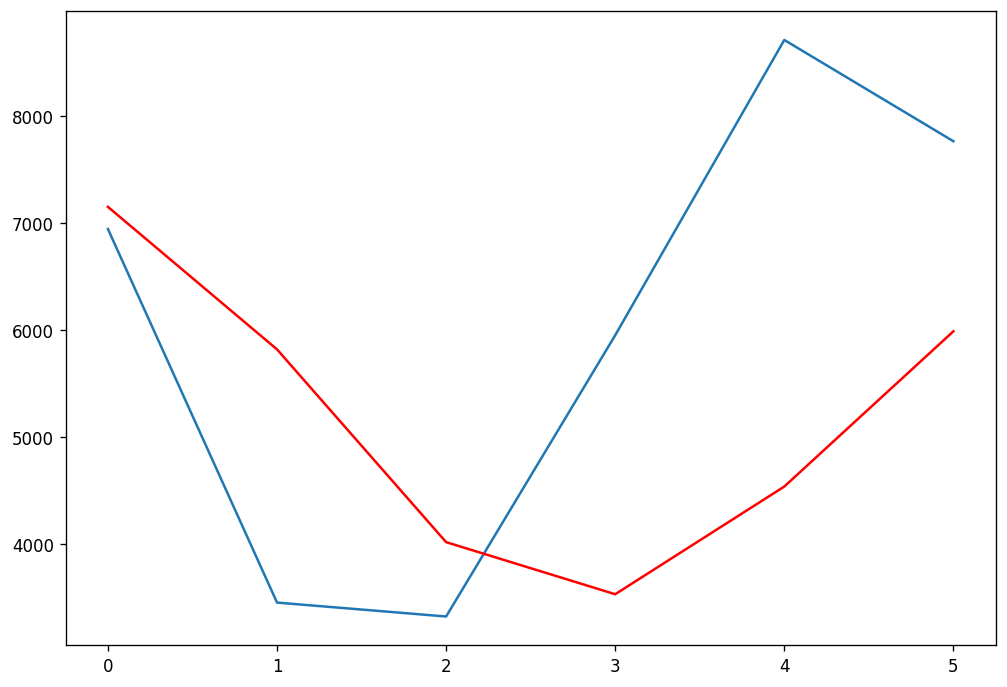

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt 
X = series_influenza.values
#split data
train, test = X[1:len(X)-6],X[len(X)-6:]
#train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' %model_fit.k_ar)
print('coefficients: %s' %model_fit.params)
#make predictions
predictions = model_fit.predict(start=len(train), end = len(train)+len(test)-1,dynamic=False)
for i in range(len(predictions)):
  print('predicted=%f,expected=%f' %(predictions[i],test[i]))
rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE:%.3f' %rmse)
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()

#### Moving Average models for forecasting


> some number of lagged error values are used to predict the error at the next time step



##### AR model for residual error

In [ ]:
from statsmodels.tsa.ar_model import AR 
#create lagged dataset
values = pd.DataFrame(series_influenza.values)
dataframe = pd.concat([values.shift(1),values],axis=1)
dataframe.columns = ['t','t+1']
## split dataset into Train and test
X =dataframe.values
train_size = int(len(X) * 42/48)
train, test = X[1:train_size],X[train_size:]
train_X,train_y = train[:,0],train[:,1]
test_X,test_y = test[:,0],test[:,1]
#presistence model on training set
train_pred = [x for x in train_X]
#calculuate residual 
train_resi = [train_y[i] - train_pred[i] for i in range(len(train_pred))]
#AR model for training set residuals
model = AR(train_resi) 
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' %(window,coef))

# this autoregression model requires the residual erro of 10 previous time steps.


Lag=10, Coef=[ 2.46078285e+02 -5.12145916e-01 -6.77710003e-01 -7.54007623e-01
 -8.07314806e-01 -6.77564582e-01 -5.13858754e-01 -2.70708583e-01
 -2.58803058e-01 -2.67514749e-01 -2.27851448e-01]


##### prediction for residual error

[-1039.0, 4856.0, 715.0, 1361.0, -1601.0, -2700.0, -1941.0, 285.0, 2002.0, 2400.0]
prediction error=48.578230, expected error=-392.000000
prediction error=-1433.247210, expected error=-3489.000000
prediction error=295.304619, expected error=-130.000000
prediction error=874.667778, expected error=2627.000000
prediction error=793.337819, expected error=2758.000000
prediction error=-480.950094, expected error=-946.000000


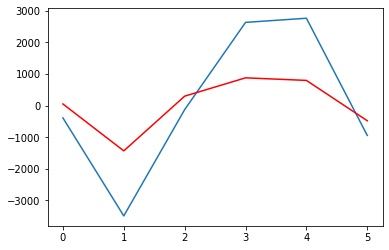

In [ ]:
#predict the residual error 
#walk forward over time steps in test
history = train_resi[len(train_resi)-window:]
print(history)
predictions_error = list()
expected_error =list()
for t in range(len(test_y)):
  #presistence 
  yhat = test_X[t]
  error = test_y[t] - yhat 
  expected_error.append(error)
  #predict error 
  length = len(history)
  lag = [history[i]  for i in range(length-window,length)]
  pred_error = coef[0]
  for d in range(window):
    pred_error += coef[d+1] * lag[window-d-1]
  predictions_error.append(pred_error)
  history.append(error)
  print('prediction error=%f, expected error=%f' %(pred_error,error))
pyplot.plot(expected_error)
pyplot.plot(predictions_error,color = 'red')

##### correct Predcitions with a model of residuals


> improved_forecast = forecast +estimated_error



predictions=7385.578230, expected=7337.000000 
predictions=5511.752790, expected=6945.000000 
predictions=3751.304619, expected=3456.000000 
predictions=4200.667778, expected=3326.000000 
predictions=6746.337819, expected=5953.000000 
predictions=8230.049906, expected=8711.000000 
Test RMSE: 1399.283


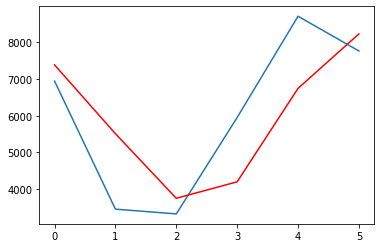

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= []
for t in range(len(test_y)):
  yhat = test_X[t]+ predictions_error[t]
  predictions.append(yhat)
  print('predictions=%f, expected=%f ' % (yhat,test_X[t]))
rmse= sqrt(mean_squared_error(test_y,predictions))
print('Test RMSE: %.3f' %rmse)
pyplot.plot(test_y)
pyplot.plot(predictions,color='red')
pyplot.show()

#### ARIMA


> 

*   AR: observation~ lagged observations
*   I: number of differencing
*   MA:a model uses the dependency between an observation and residual errors from a moving average model applied to lagged observations

p,d,q 

*   p: number of lag observation= lag order 
*   d:the degree of differencing
*   q: size of the moving average window= the order of moving average 











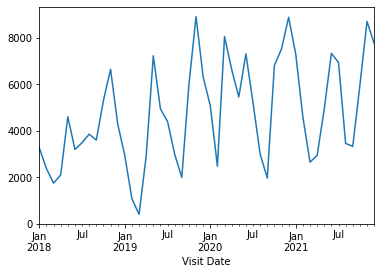

In [ ]:
#plot influenza time series
series_influenza.plot()
pyplot.show()
# has a trend. this suggests that the time series is not stationary and will require differencing to make it stationary
#at leat a differentce order of 1 

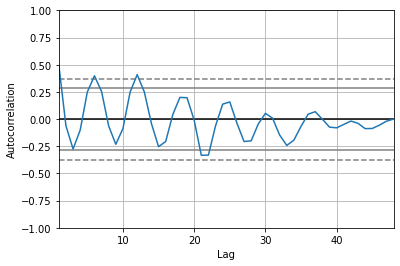

In [ ]:
# atuoregression plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_influenza)
pyplot.show()

#### ARIMA model for forecasting


> **introduction to Time Series Forecasting** P309




##### baseline forecasting

In [ ]:
#baseline of preformance
from sklearn.metrics import mean_squared_error
from math import sqrt
train_size = int(len(series_influenza)*42/48)
X=series_influenza.values
train,test = series_influenza[0:train_size],series_influenza[train_size:]
history = [x for x in train]
print(history)
print(history[-1])
predictions = list()
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
  #obeservation
  obs= test[i]
  history.append(obs)
  print('>prediction = %.3f , expected = %.3f' %(yhat,obs))
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE is %f' %rmse)
# on avarage, the model was wrong by about 2150 comsumption for each prediction made

[3258, 2370, 1744, 2097, 4603, 3194, 3485, 3855, 3598, 5305, 6650, 4303, 2930, 1065, 399, 2900, 7232, 4947, 4401, 2986, 1989, 5985, 8919, 6323, 5081, 2473, 8067, 6643, 5458, 7314, 5205, 2999, 1960, 6816, 7531, 8892, 7291, 4591, 2650, 2935, 4937, 7337]
7337
>prediction = 7337.000 , expected = 6945.000
>prediction = 6945.000 , expected = 3456.000
>prediction = 3456.000 , expected = 3326.000
>prediction = 3326.000 , expected = 5953.000
>prediction = 5953.000 , expected = 8711.000
>prediction = 8711.000 , expected = 7765.000
RMSE is 2150.437707


##### manually configure ARIMA


>



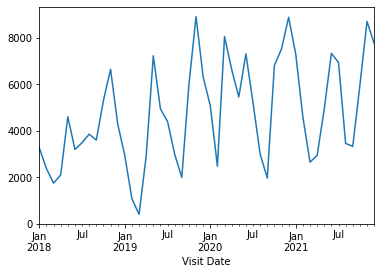

In [ ]:
series_influenza.plot()

In [ ]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

# create differenced series
def difference(dataset,interval=1):
  diff = list()
  for i in range(interval,len(dataset)):
    value = dataset[i]-dataset[i - interval]
    diff.append(value)
  return Series(diff)

# difference data
#months_in_year=12
#stantionary=series_influenza.diff()
stantionary = difference(series_influenza,12)
#stantionary.index =series_influenza.index[1:] 
#check if staitionary 
# H0: it is a non-stionary ts
result = adfuller(stantionary)
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key,value))
# this result show that the test statistic value -5.968160 is smaller than the critical value at 1%: -3.597
# we can reject the null hypothesis with a significance level of less than 1% 
# this time series after differencing is stationary

ADF Statistic: -4.143744
p-value: 0.000819
Critical values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


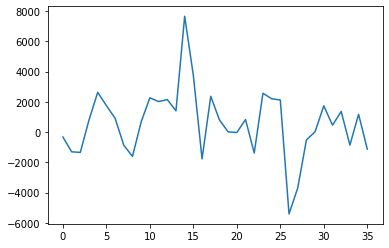

In [ ]:
stantionary.plot()
pyplot.show()

##### 怎么判定需不需要第二次 differencing

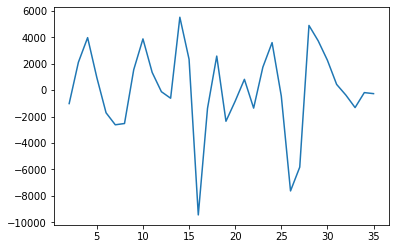

In [ ]:

stantionary1 =  stantionary.diff(2)
stantionary1.plot()

##### test seanality & plot 

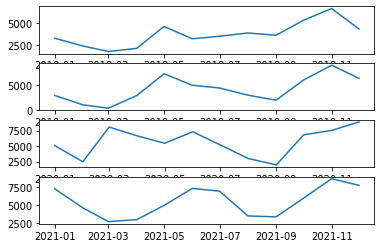

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = series_influenza['2018':'2021'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
  pyplot.subplot((n_groups*100) + 10 + i)
  i += 1
  pyplot.plot(group)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


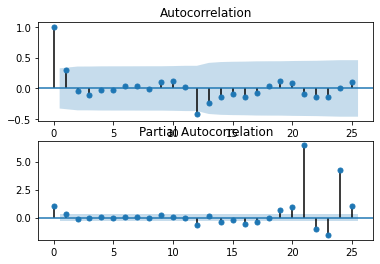

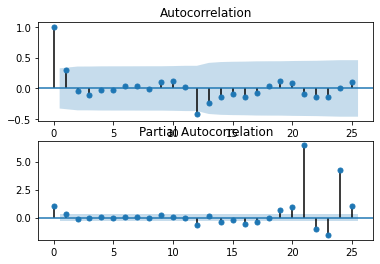

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(stantionary,lags=25,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(stantionary,lags=25,ax=pyplot.gca())

#ACF suggests q = 4, and p=0, intergarted =1 


##### Test ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error
#from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.tsa.arima.model.ARIMA
#statsmodels.tsa.arima.model.ARIMA
import statsmodels.api as sm

#sm.tsa.ARIMA()
model = sm.tsa.ARIMA(series_influenza,order=(0,1,3))
model_fit = model.fit(transparams=False)
# summary of fit model
print(model_fit.summary())


'''for i in range(len(test)):
  
  #model_fit = model.fit(trend='nc',disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  obs= test[i]
  history.append(obs)
  print('>prediction = %.3f , expected = %.3f' %(yhat,obs))
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE is %f' %rmse)'''

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:811: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


                                 ARIMA Model Results                                  
Dep. Variable:     D.INFLUENZA (QUADRIVALENT)   No. Observations:                   47
Model:                         ARIMA(0, 1, 3)   Log Likelihood                -418.393
Method:                               css-mle   S.D. of innovations           1719.448
Date:                        Wed, 23 Feb 2022   AIC                            846.786
Time:                                08:30:07   BIC                            856.037
Sample:                            02-01-2018   HQIC                           850.267
                                 - 12-01-2021                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               71.0553     31.560      2.251      0.030       9.199     132.911
m

"for i in range(len(test)):\n  \n  #model_fit = model.fit(trend='nc',disp=0)\n  yhat = model_fit.forecast()[0]\n  predictions.append(yhat)\n  obs= test[i]\n  history.append(obs)\n  print('>prediction = %.3f , expected = %.3f' %(yhat,obs))\nrmse = sqrt(mean_squared_error(test,predictions))\nprint('RMSE is %f' %rmse)"

##### Test ARIMA with differencing seasonality


In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]
 
# prepare data
X = series_influenza.values
X = X.astype('float32')
train_size = int(len(X) * 42 / 48)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# difference data
  months_in_year = 12
  diff = difference(history, months_in_year)
  print(diff)
  # predict
  model = ARIMA(diff, order=(5,0,3))
  model_fit = model.fit(trend='nc', disp=0)
  yhat = model_fit.forecast()[0]
  yhat = inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

[-328.0, -1305.0, -1345.0, 803.0, 2629.0, 1753.0, 916.0, -869.0, -1609.0, 680.0, 2269.0, 2020.0, 2151.0, 1408.0, 7668.0, 3743.0, -1774.0, 2367.0, 804.0, 13.0, -29.0, 831.0, -1388.0, 2569.0, 2210.0, 2118.0, -5417.0, -3708.0, -521.0, 23.0]
>Predicted=5114.704, Expected=6945.000
[-328.0, -1305.0, -1345.0, 803.0, 2629.0, 1753.0, 916.0, -869.0, -1609.0, 680.0, 2269.0, 2020.0, 2151.0, 1408.0, 7668.0, 3743.0, -1774.0, 2367.0, 804.0, 13.0, -29.0, 831.0, -1388.0, 2569.0, 2210.0, 2118.0, -5417.0, -3708.0, -521.0, 23.0, 1740.0]
>Predicted=4148.565, Expected=3456.000
[-328.0, -1305.0, -1345.0, 803.0, 2629.0, 1753.0, 916.0, -869.0, -1609.0, 680.0, 2269.0, 2020.0, 2151.0, 1408.0, 7668.0, 3743.0, -1774.0, 2367.0, 804.0, 13.0, -29.0, 831.0, -1388.0, 2569.0, 2210.0, 2118.0, -5417.0, -3708.0, -521.0, 23.0, 1740.0, 457.0]
>Predicted=1469.950, Expected=3326.000
[-328.0, -1305.0, -1345.0, 803.0, 2629.0, 1753.0, 916.0, -869.0, -1609.0, 680.0, 2269.0, 2020.0, 2151.0, 1408.0, 7668.0, 3743.0, -1774.0, 2367.0, 

##### series after differencing seasonality


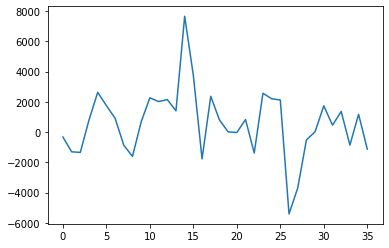

In [ ]:
##### Test ARIMA
diff = difference(history, months_in_year)
pd.Series(diff).plot()

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

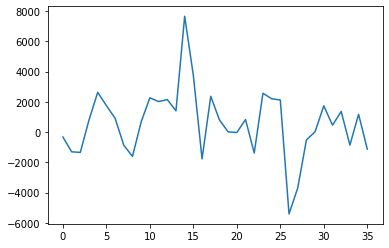

In [ ]:
diff1 = difference(series_influenza,12)
pd.Series(diff1).plot()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


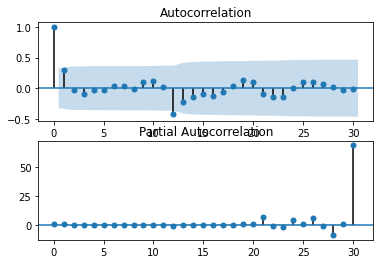

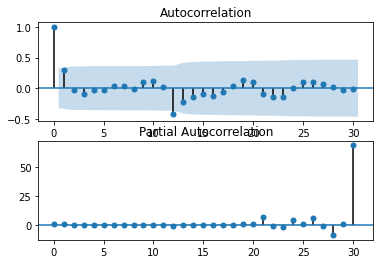

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(diff1,lags=30,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(diff1,lags=30,ax=pyplot.gca())

[-328,
 -1305,
 -1345,
 803,
 2629,
 1753,
 916,
 -869,
 -1609,
 680,
 2269,
 2020,
 2151,
 1408,
 7668,
 3743,
 -1774,
 2367,
 804,
 13,
 -29,
 831,
 -1388,
 2569,
 2210,
 2118,
 -5417,
 -3708,
 -521,
 23,
 1740,
 457,
 1366,
 -863,
 1180,
 -1127]

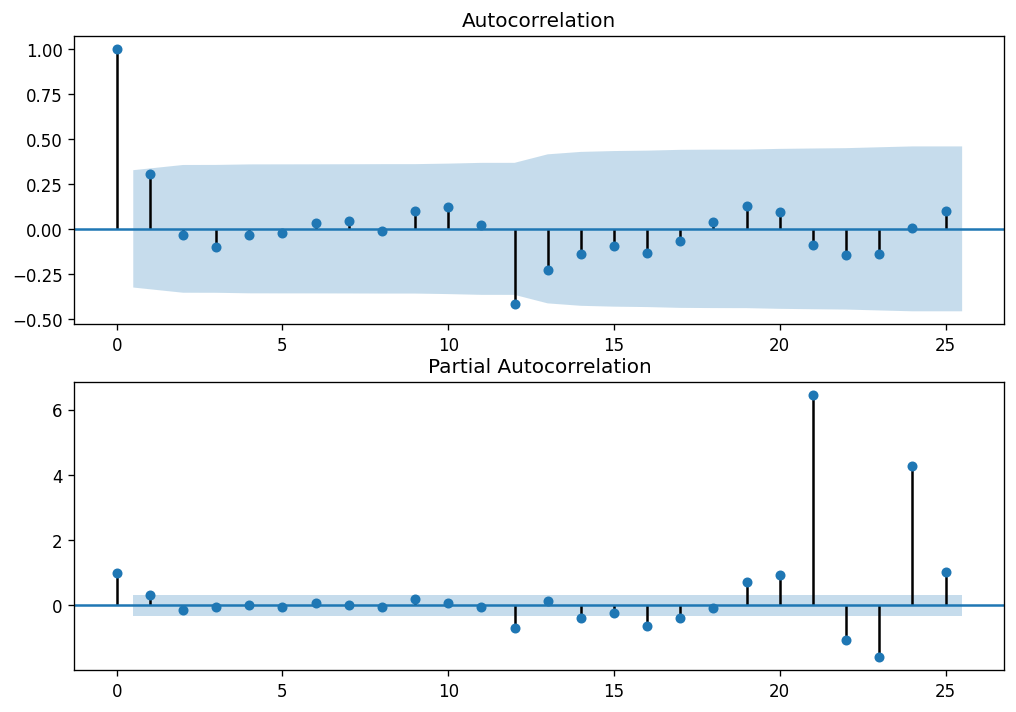

In [ ]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(diff1,lags=25,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(diff1,lags=25,ax=pyplot.gca())
diff1

In [ ]:
months_in_year = 12
diff = difference(diff1, months_in_year)


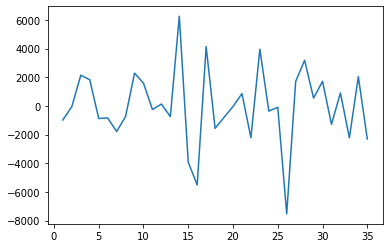

In [ ]:
pd.Series(diff).plot()

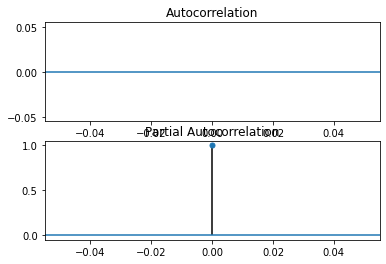

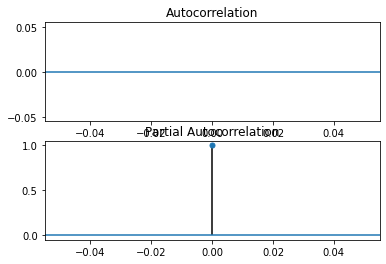

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(diff,lags=32,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(diff,lags=32,ax=pyplot.gca())

In [ ]:
series_influenza

VisitDate
2018-01-01    3258
2018-02-01    2370
2018-03-01    1744
2018-04-01    2097
2018-05-01    4603
2018-06-01    3194
2018-07-01    3485
2018-08-01    3855
2018-09-01    3598
2018-10-01    5305
2018-11-01    6650
2018-12-01    4303
2019-01-01    2930
2019-02-01    1065
2019-03-01     399
2019-04-01    2900
2019-05-01    7232
2019-06-01    4947
2019-07-01    4401
2019-08-01    2986
2019-09-01    1989
2019-10-01    5985
2019-11-01    8919
2019-12-01    6323
2020-01-01    5081
2020-02-01    2473
2020-03-01    8067
2020-04-01    6643
2020-05-01    5458
2020-06-01    7314
2020-07-01    5205
2020-08-01    2999
2020-09-01    1960
2020-10-01    6816
2020-11-01    7531
2020-12-01    8892
2021-01-01    7291
2021-02-01    4591
2021-03-01    2650
2021-04-01    2935
2021-05-01    4937
2021-06-01    7337
2021-07-01    6945
2021-08-01    3456
2021-09-01    3326
2021-10-01    5953
2021-11-01    8711
2021-12-01    7765
Name: INFLUENZA_QUADRIVALENT, dtype: int64

##### remove Seasonality and Grid search ARIMA Hyperparameters


In [ ]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy


# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff


#invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 42 /48)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    #print(diff)
    model = ARIMA(diff, order=arima_order)
    print(arima_order)
    model_fit = model.fit(trend='nc', disp=0)
    #model_fit = model.fit(transparams=False)
    aic= model_fit.aic
    print(aic)
    yhat = model_fit.forecast()[0]
    print(yhat)
    yhat = inverse_difference(history, yhat, months_in_year)
    print('inversed yhat %.3f' % yhat)
    predictions.append(yhat)
    history.append(test[t])
    print('>Predicted=%.3f, Expected=%.3f' % (predictions[t], test[t]))
    print(t, predictions[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  #rmse =1
  return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# load dataset
series = series_influenza
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

(0, 0, 0)
(0, 0, 1)
551.7709842116578
19.11829519323379
inversed yhat 5224.118
>Predicted=5224.118, Expected=6945.000
0 5224.118295193234
(0, 0, 1)
569.6187731613562
730.6070920872801
inversed yhat 3729.607
>Predicted=3729.607, Expected=3456.000
1 3729.60709208728
(0, 0, 1)
586.8578549276598
-114.70343141061504
inversed yhat 1845.297
>Predicted=1845.297, Expected=3326.000
2 1845.296568589385
(0, 0, 1)
604.5228756357022
614.5878354647726
inversed yhat 7430.588
>Predicted=7430.588, Expected=5953.000
3 7430.587835464773
(0, 0, 1)
622.1716328586035
-586.6856097326516
inversed yhat 6944.314
>Predicted=6944.314, Expected=8711.000
4 6944.314390267348
(0, 0, 1)
640.0117950753146
665.7951801883486
inversed yhat 9557.795
>Predicted=9557.795, Expected=7765.000
5 9557.795180188348
ARIMA(0, 0, 1) RMSE=1513.679
(0, 0, 2)
553.7222530801837
0.6121680207169149
inversed yhat 5205.612
>Predicted=5205.612, Expected=6945.000
0 5205.612168020717
(0, 0, 2)
571.5823519216261
765.7467884634709
inversed yhat 37

##### Review Residual Errors

In [ ]:
def evaluate_season_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 42 /48)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    #print(diff)
    model = ARIMA(diff, order=arima_order)
    print(arima_order)
    model_fit = model.fit(trend='nc', disp=0)
    #model_fit = model.fit(transparams=False)
    aic= model_fit.aic
    print(aic)
    yhat = model_fit.forecast()[0]
    print(yhat)
    yhat = inverse_difference(history, yhat, months_in_year)
    print('inversed yhat %.3f' % yhat)
    predictions.append(yhat)
    history.append(test[t])
    print('>Predicted=%.3f, Expected=%.3f' % (predictions[t], test[t]))
    print(t, predictions[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  #rmse =1
  return rmse,predictions,model_fit

(5, 0, 3)
563.6644158106567
-90.2961925143727
inversed yhat 5114.704
>Predicted=5114.704, Expected=6945.000
0 5114.703807485627
(5, 0, 3)
581.5585845892965
1149.56473953244
inversed yhat 4148.565
>Predicted=4148.565, Expected=3456.000
1 4148.5647395324395
(5, 0, 3)
598.7741352711827
-490.0498341863797
inversed yhat 1469.950
>Predicted=1469.950, Expected=3326.000
2 1469.9501658136203
(5, 0, 3)
617.8483858456875
-116.01642188317885
inversed yhat 6699.984
>Predicted=6699.984, Expected=5953.000
3 6699.983578116821
(5, 0, 3)
635.0424519782312
235.43765641377126
inversed yhat 7766.438
>Predicted=7766.438, Expected=8711.000
4 7766.437656413771
(5, 0, 3)
652.2565795636702
-339.76599036956645
inversed yhat 8552.234
>Predicted=8552.234, Expected=7765.000
5 8552.234009630434
                 0
count     6.000000
mean    400.687674
std    1294.694347
min    -787.234010
25%    -733.378868
50%     125.998802
75%    1608.862730
max    1856.049834
             0
0  1830.296193
1  -692.564740
2  1856.0

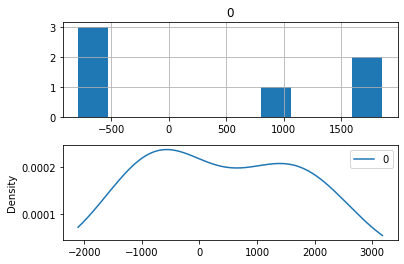

In [ ]:

rmse, prediction1,model_fit1 = evaluate_season_arima_model(series_influenza,(5,0,3))
residuals = [test[i] - prediction1[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
print(residuals)
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde',ax = pyplot.gca())
pyplot.show()

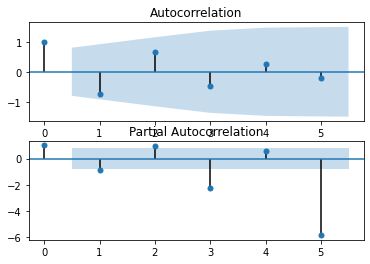

In [ ]:
#residual ACF PACF 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals,ax=pyplot.gca())
pyplot.show()


##### Save model


In [ ]:
bias = 400.687674
#save model 
from google.colab import files
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
  return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__

# save model
model_fit1.save('/content/drive/MyDrive/Colab Notebooks/SHP/model.pkl')
files.download('/content/drive/MyDrive/Colab Notebooks/SHP/model.pkl') 
numpy.save('/content/drive/MyDrive/Colab Notebooks/SHP/model_bias.npy', [bias])
model_fit1.summary

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARMAResults object at 0x7f3d26eff510>>

##### use saved model to do prediction


In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]
train_size = int(len(series_influenza) * 42 /48)
train, test = series_influenza[0:train_size], series_influenza[train_size:]
months_in_year = 12
model_fit = ARIMAResults.load('/content/drive/MyDrive/Colab Notebooks/SHP/model.pkl')
bias = numpy.load('/content/drive/MyDrive/Colab Notebooks/SHP/model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(train.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)
#series_influenza
test[0]



Predicted: 5265.922


6945

In [ ]:
# stacked line plots for each vaccine 


# Vaccine plot


## 

In [ ]:
for i in range(len(df.columns.values)):
  series = df.iloc[:,i]
  print(df.columns[i])
  print(i)

ADSORBED_TETANUS
0
ADULT_DIPTHERIA_TETANUS_(SINGLE_DOSE)
1
CHICKENPOX_1_DOSE
2
HPV_VACCINATION_DOSE
3
IMM_HEP_A_ADULT_1_DOSE
4
IMM_HEP_B_BOOSTER
5
IMM_HEP_B_DOSE
6
MMR_1_DOSE
7
ROTAVIRUS_VACCINATION
8
TDAP_VACINNATION
9
TYPHOID_VACCINE_INJECTABLE
10
INFLUENZA_QUADRIVALENT
11
IMM_HEP_A_B
12
IMM_PNEUMOCOCCAL
13
MENINGOCOCCAL_VACCINATION
14
NCIS_DTPA_IPV_HIB_5_IN_1
15
NCIS_DTPA-IPV-HIB-HEPB_6_IN_1_1_DOSE
16


In [ ]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 34 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   index                                                                                           241 non-null    int64  
 1   Visit Date Year                                                                                 241 non-null    int64  
 2   Visit Date Month No                                                                             241 non-null    int64  
 3   Visit Date Month w Year                                                                         241 non-null    object 
 4   Week of Year                                                                                    241 non-null    int64  
 5   ADSORBED TETANU

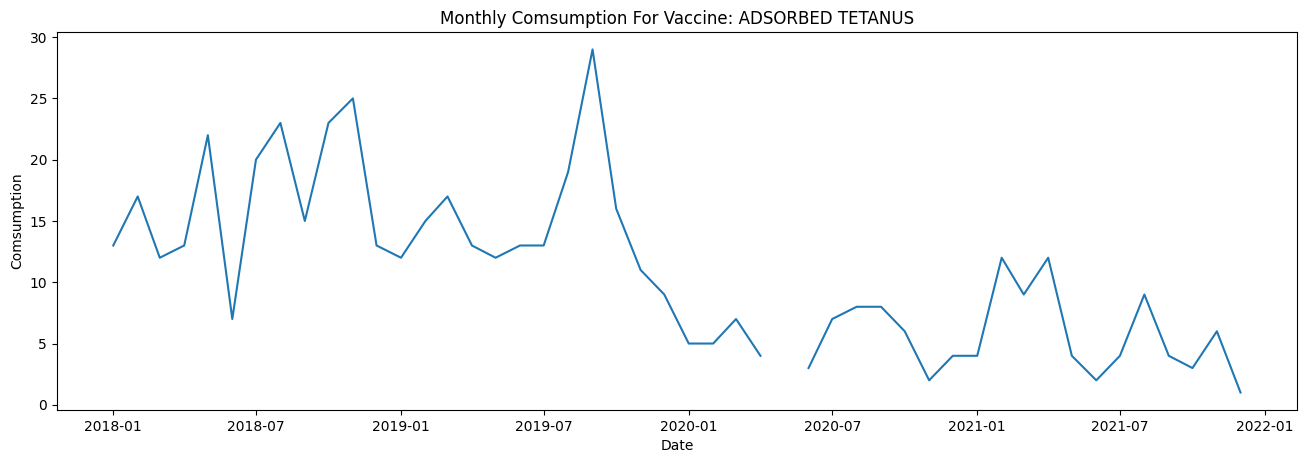

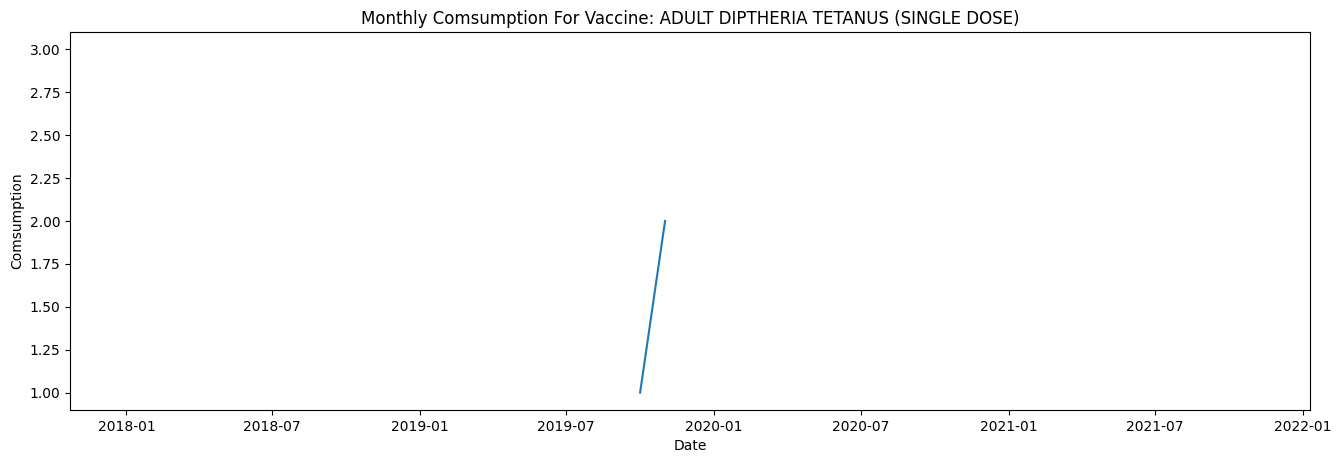

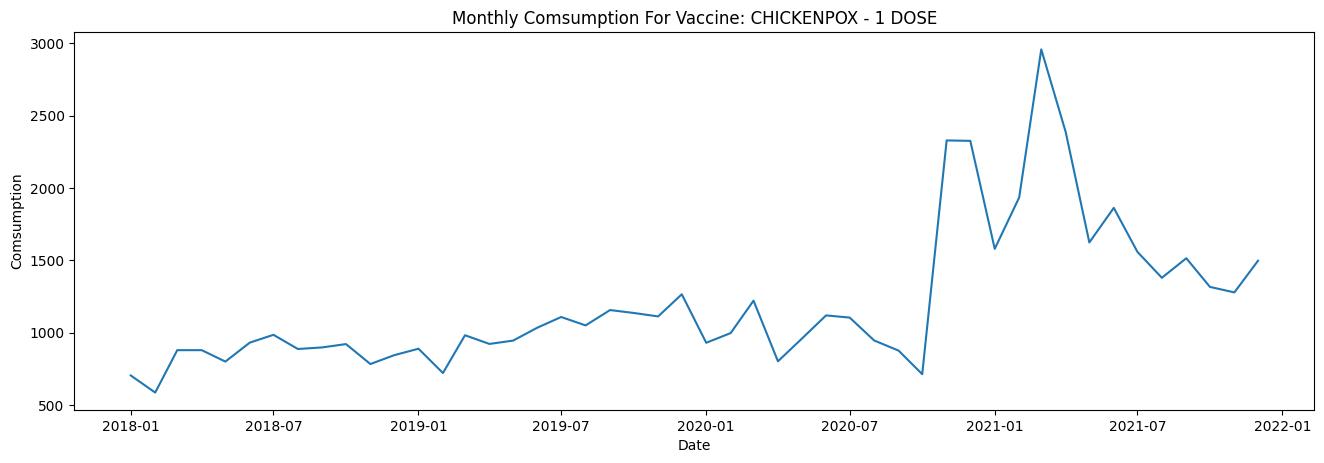

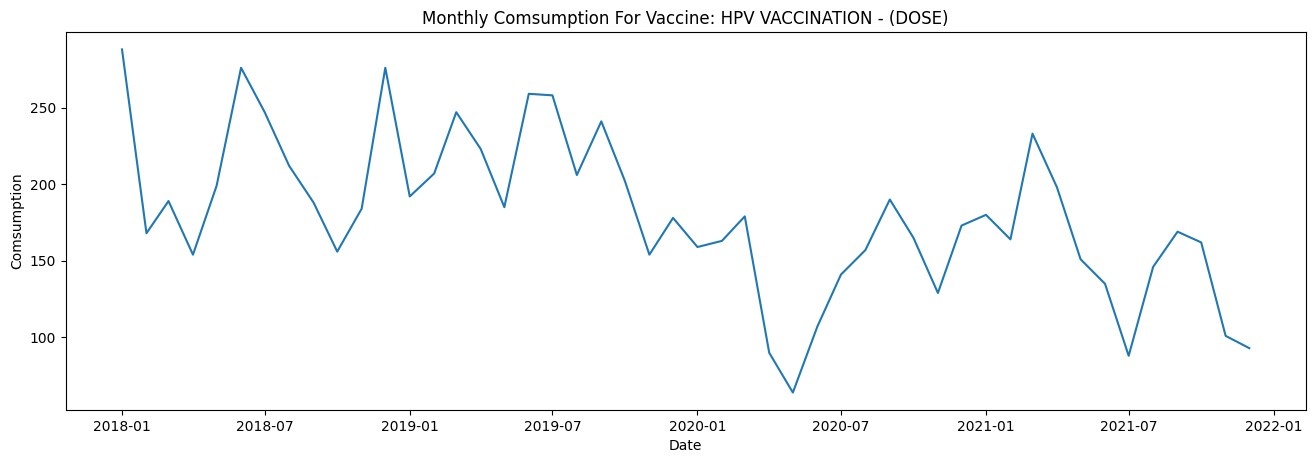

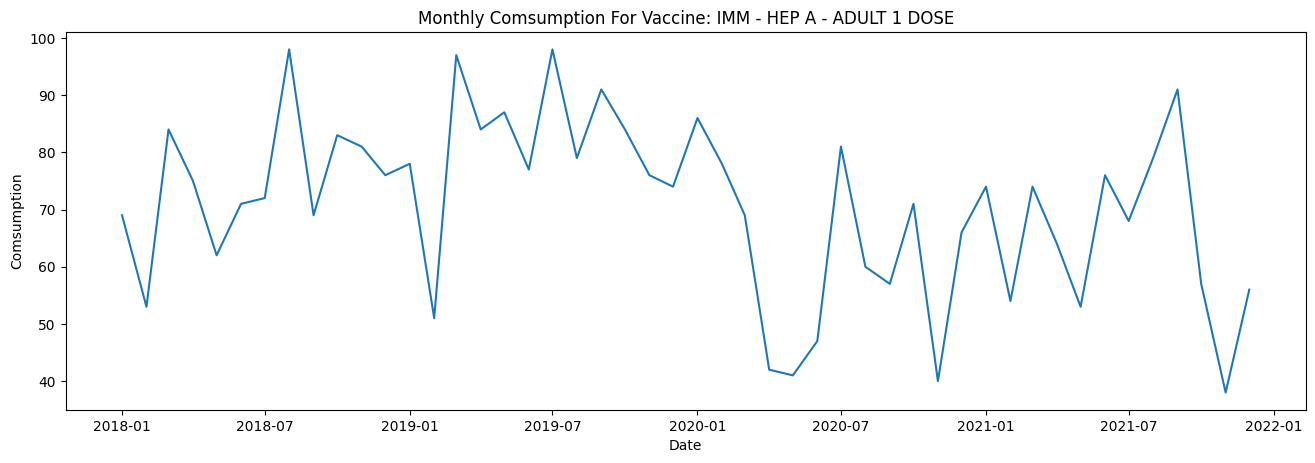

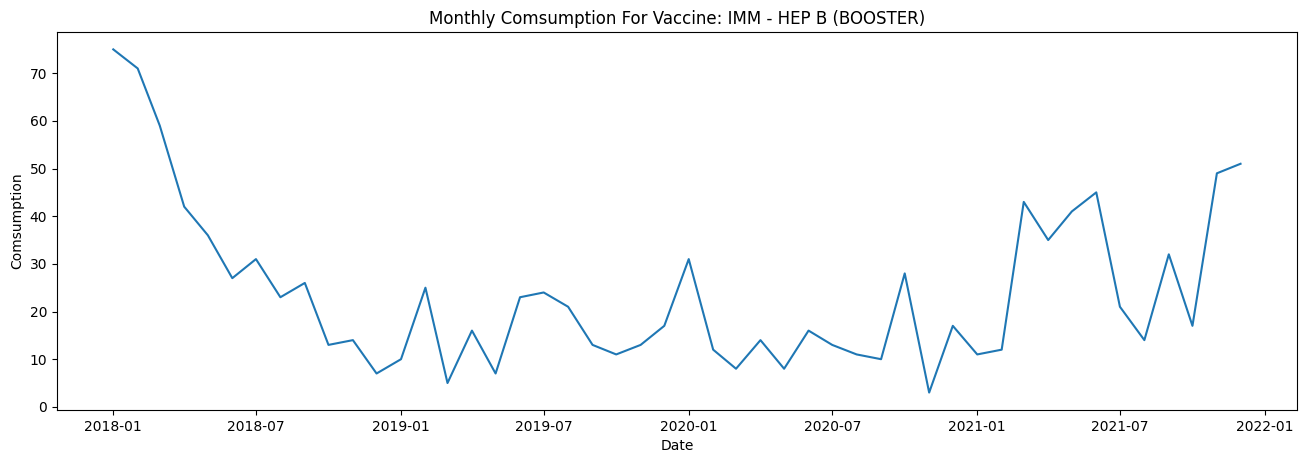

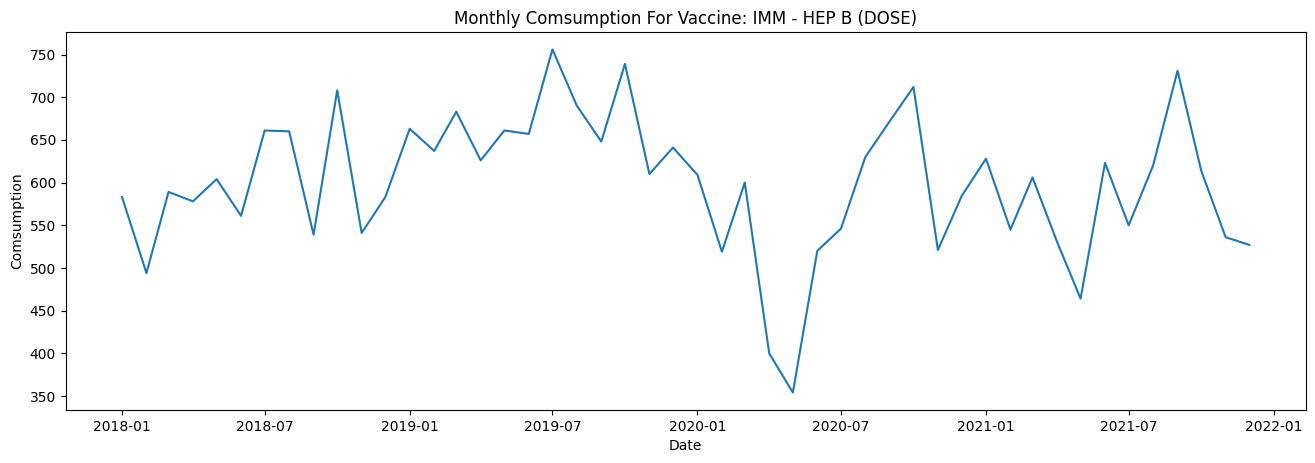

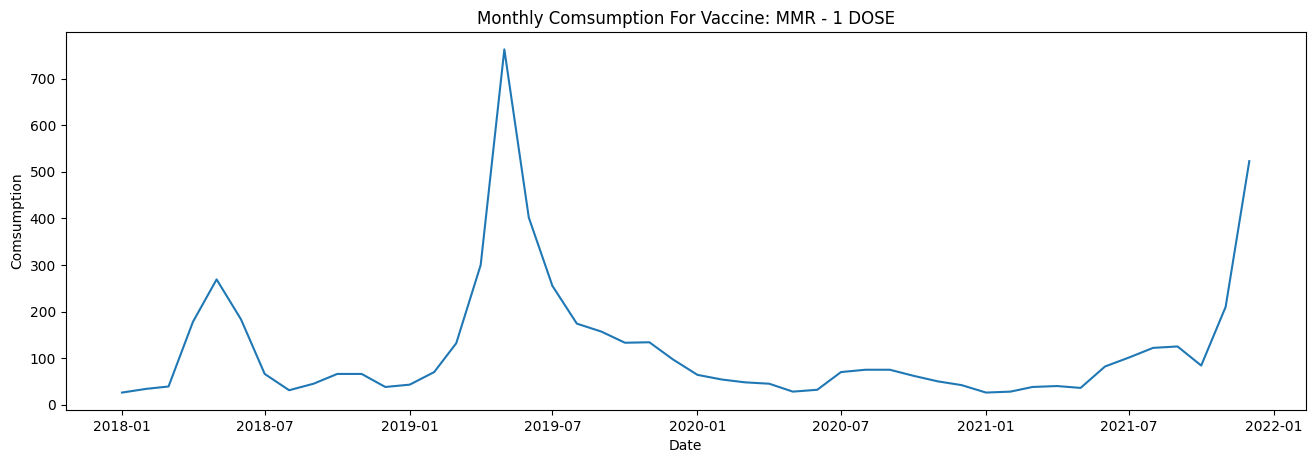

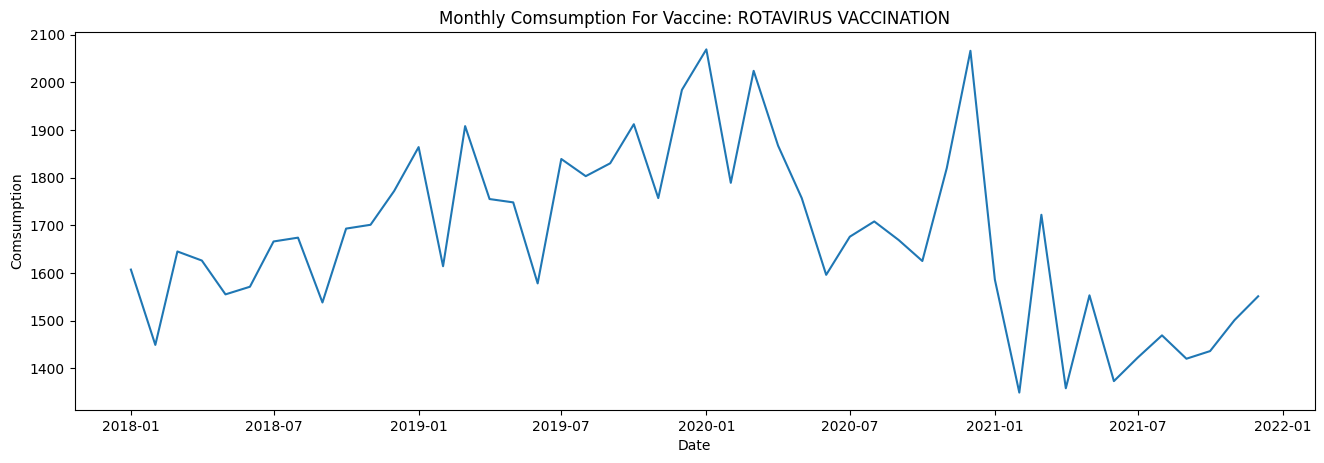

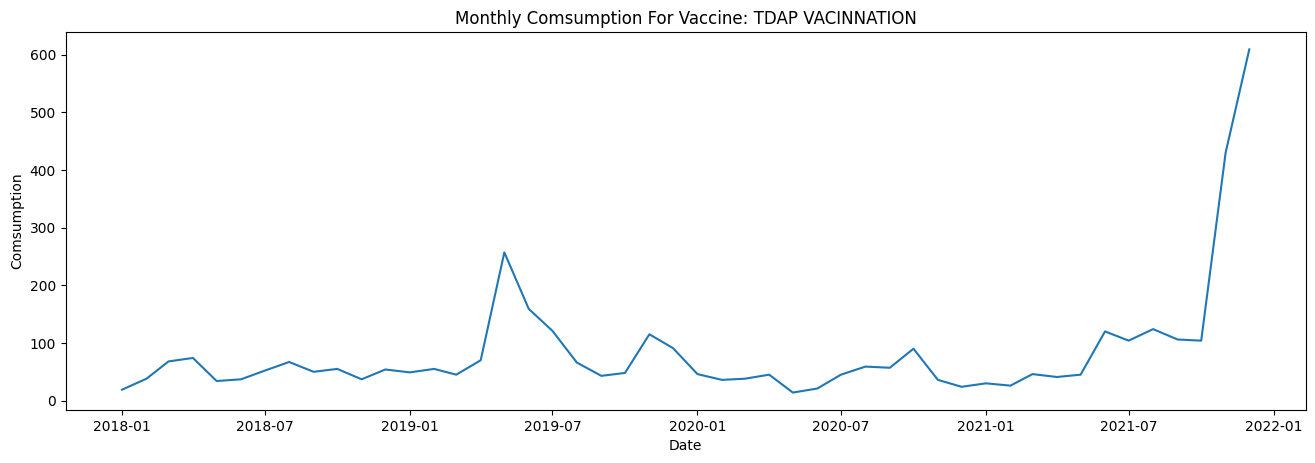

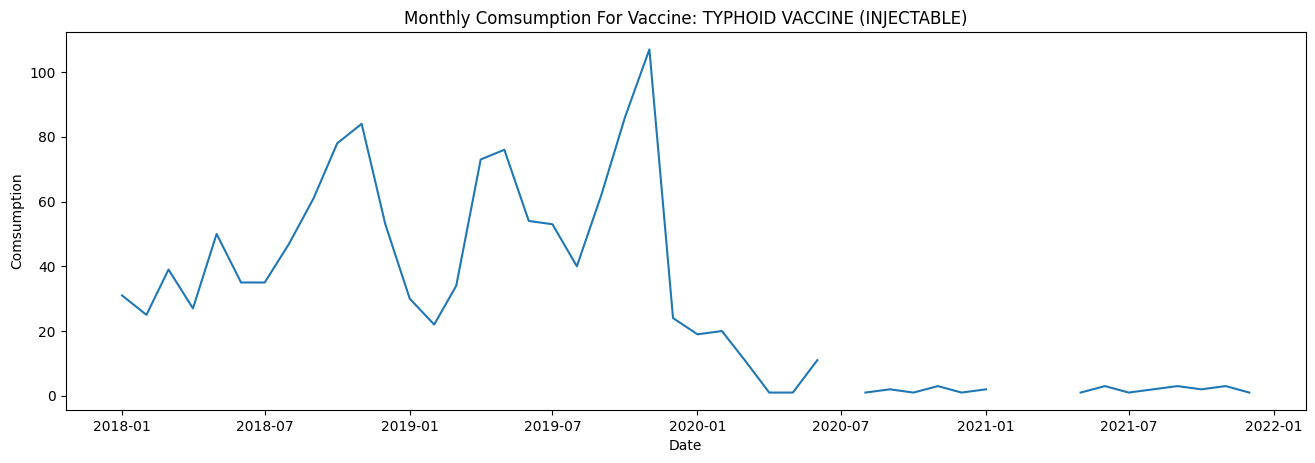

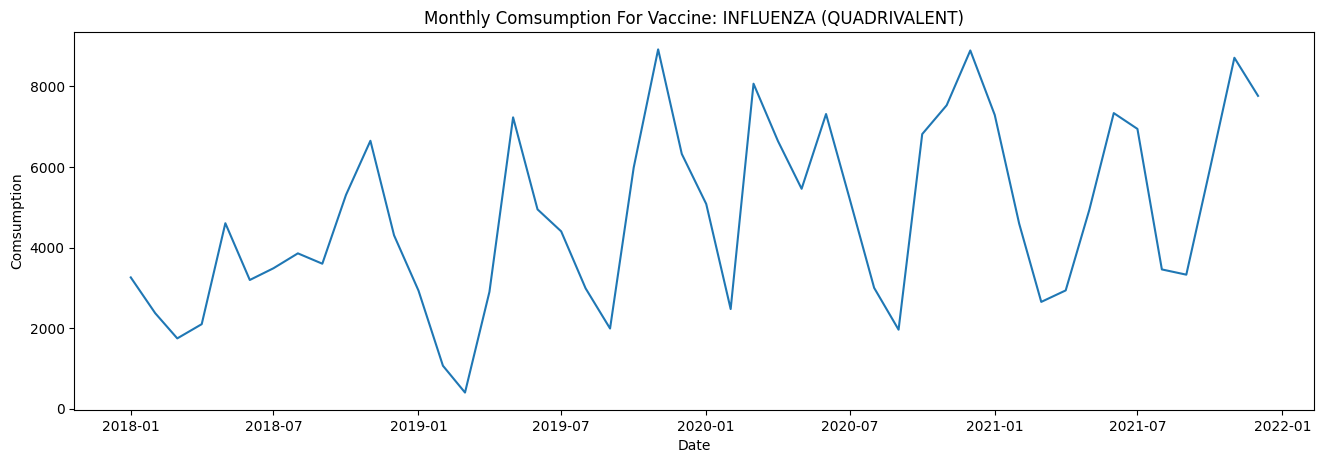

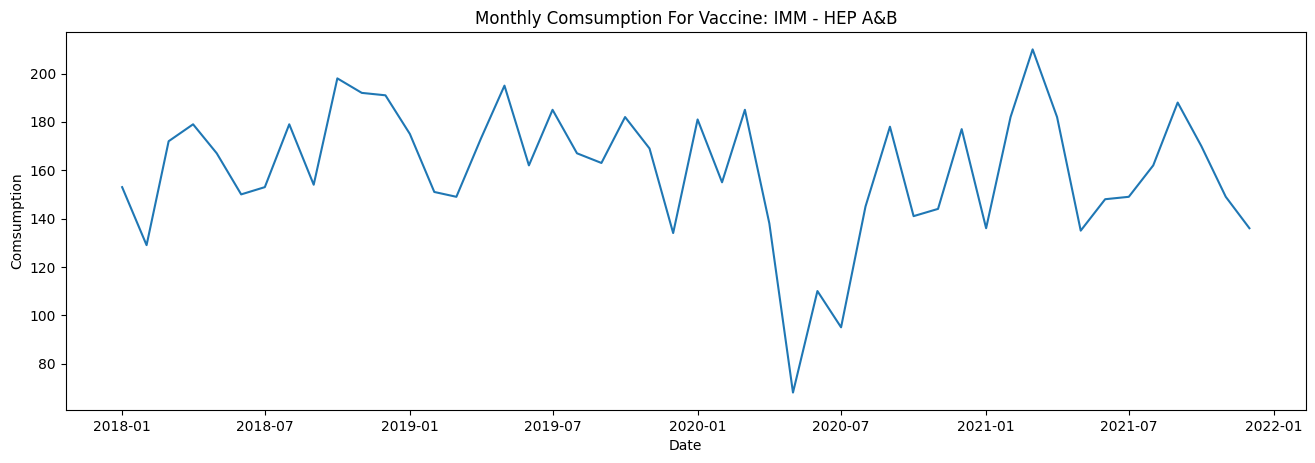

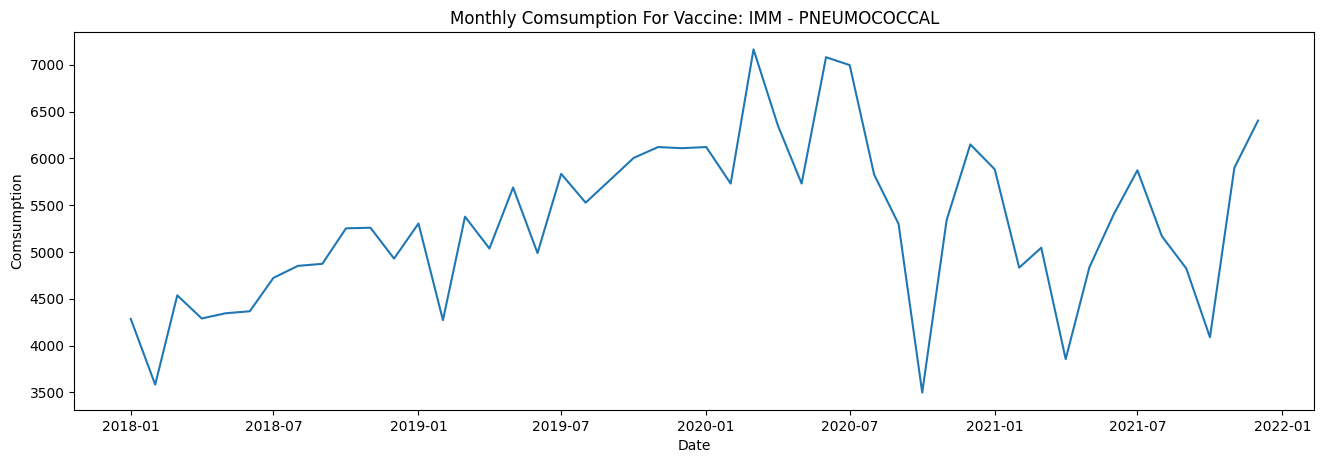

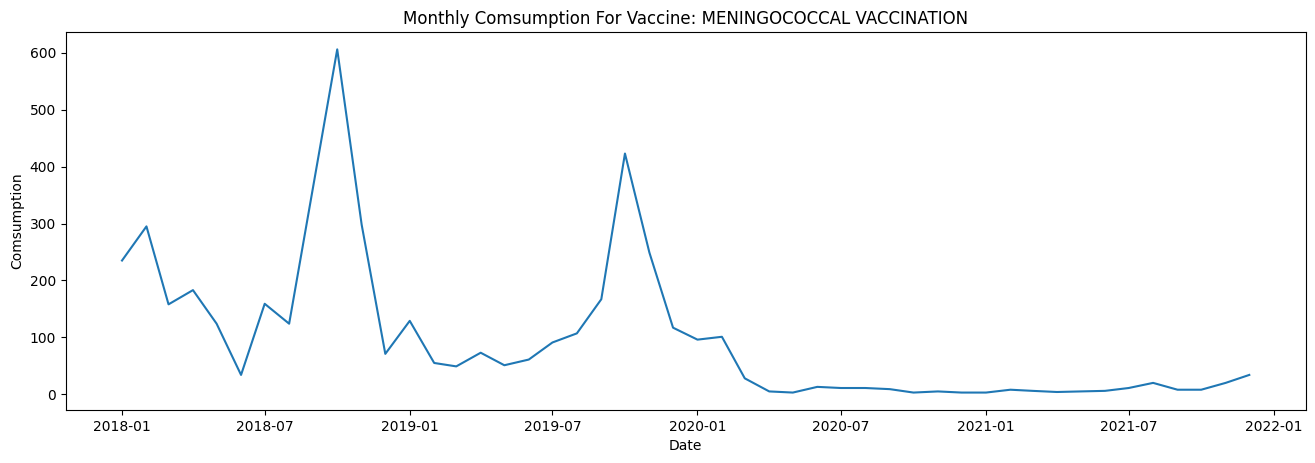

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Comsumption', dpi=100):
    pyplot.figure(figsize=(16,5), dpi=dpi)
    pyplot.plot(x, y)#, color='tab:red'
    pyplot.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    pyplot.show()
for i in range(len(vaccine_list)):
  plot_df(df, x=df.index, y=df[vaccine_list[i]], title='Monthly Comsumption For Vaccine: '+ vaccine_list[i])
#plot_df(df, x=df['Visit Date'], y=df['INFLUENZA (QUADRIVALENT) 流感（四价）'], title='Weekly Comsumption for Vacainee from 2019 to 2021.')
#plot_df(df, x=df['Visit Date'], y=df['ADSORBED TETANUS 吸附破伤风'], title='Weekly Comsumption for Vacainee from 2019 to 2021.')

In [ ]:
# list weekly vaccine
vaccine_weekly_list = dfw.columns.values.tolist()
print(vaccine_weekly_list) 

['index', 'Visit Date Year', 'Visit Date Month No', 'Visit Date Month w Year', 'Week of Year', 'ADSORBED TETANUS 吸附破伤风', 'ADULT DIPTHERIA TETANUS (SINGLE DOSE) 成人白喉破伤风（单剂量）', 'CHICKENPOX - 1 DOSE 水痘 - 1剂', 'COVID-19 VACCINATION', 'DTPA + HIB - 1 DOSE', 'HPV VACCINATION - (DOSE)', 'IMM - HEP A - ADULT 1 DOSE 甲型肝炎疫苗', 'IMM - HEP A&B - (1 DOSE) - 16 - 19 YRS 甲型肝炎疫苗 A& B ', 'IMM - HEP A&B - (1 DOSE) - 20 YRS & ABOVE 甲型肝炎疫苗', 'IMM - HEP A&B - (BOOSTER) - 16 - 19 YRS', 'IMM - HEP A&B - (BOOSTER) - 20 YRS & ABOVE', 'IMM - HEP B (BOOSTER)', 'IMM - HEP B (DOSE)甲型肝炎疫苗', 'IMM - PNEUMOCOCCAL - PCV13 肺炎球菌 - PCV13', 'IMM - PNEUMOCOCCAL - PCV13 (HIGH RISK)', 'IMM - PNEUMOCOCCAL - PPSV23', 'INFLUENZA', 'INFLUENZA (H1N1) - 6 MONTHS TO < 3 YEARS', 'INFLUENZA (QUADRIVALENT) 流感（四价）', 'MENINGOCOCCAL VACCINATION (CONJUGATE)脑膜炎球菌疫苗接种（结合物）', 'MENINGOCOCCAL VACCINATION (POLYSACCHARIDE) 脑膜炎球菌疫苗接种（多糖）', 'MMR - 1 DOSE Measles, Mumps, and Rubella (MMR) Vaccination  麻疹、腮腺炎和风疹 （MMR） 疫苗接种', 'ORAL POLIO 口腔脊髓灰质炎', 'ROT

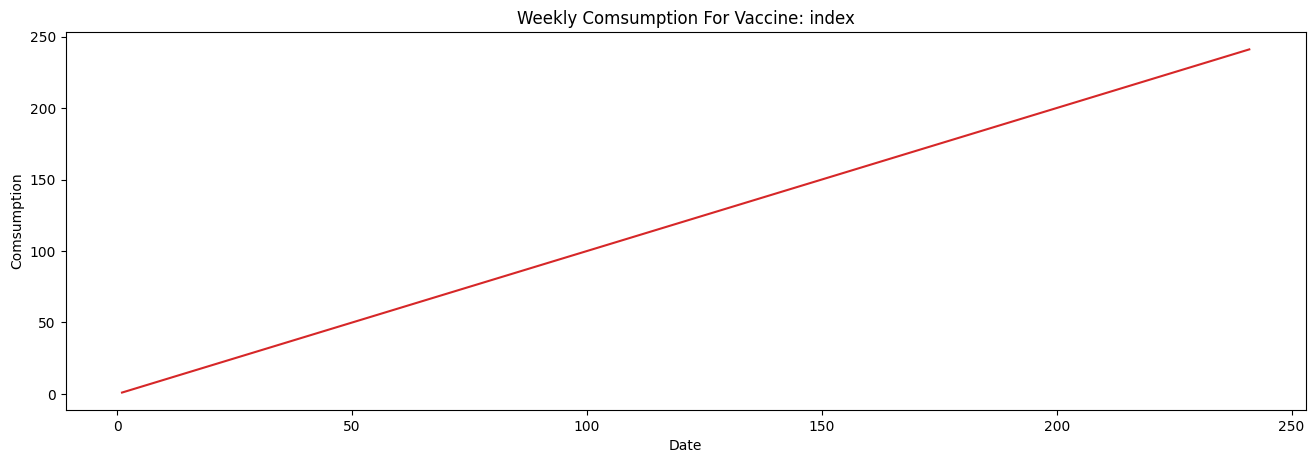

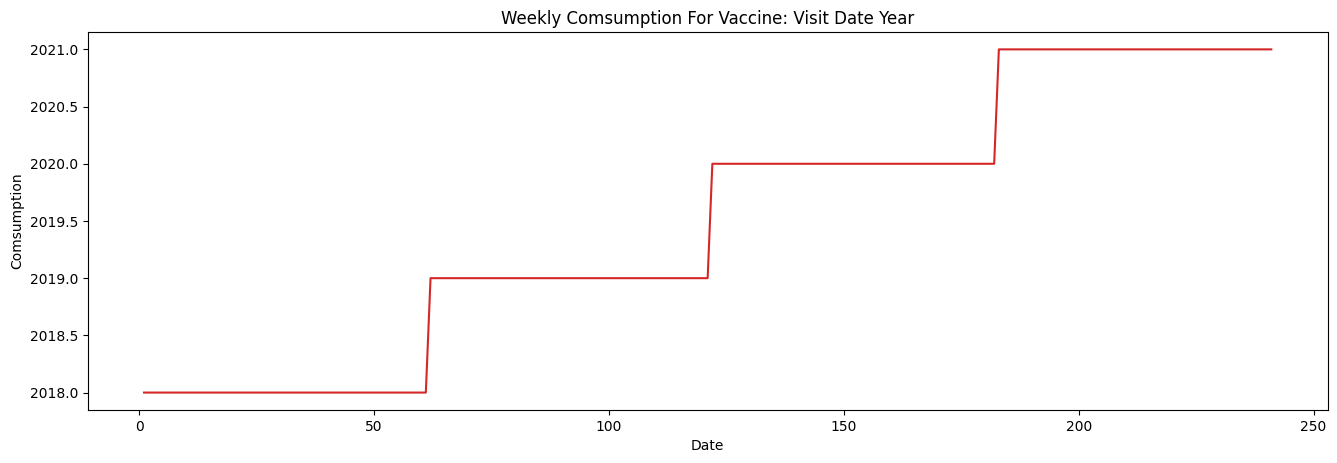

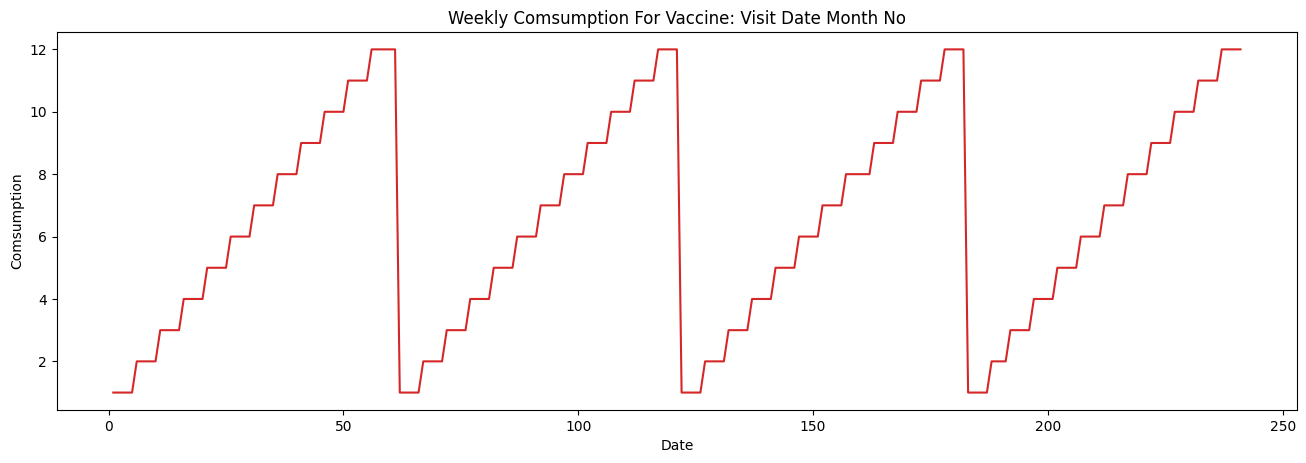

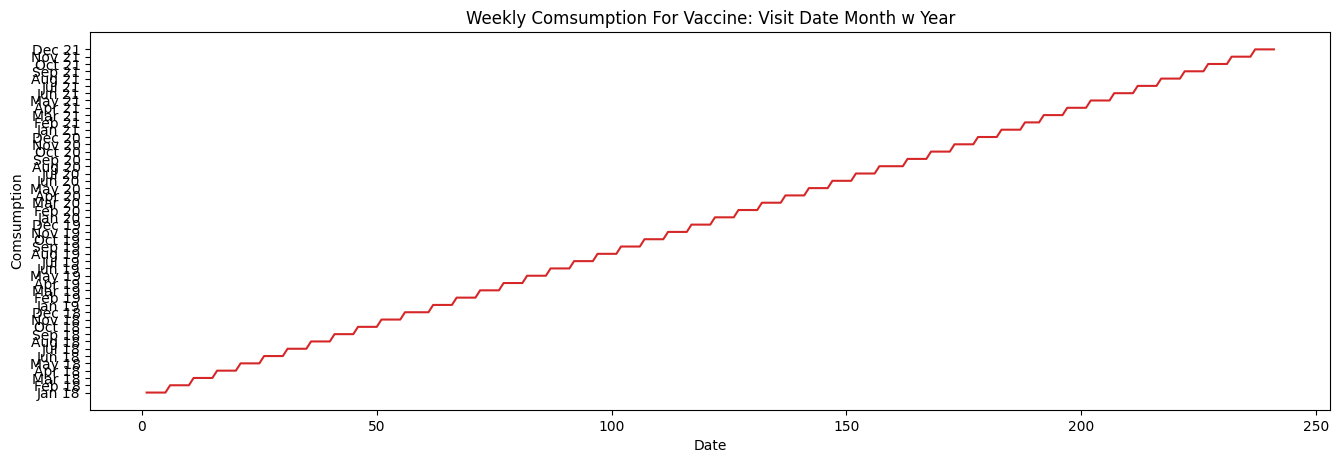

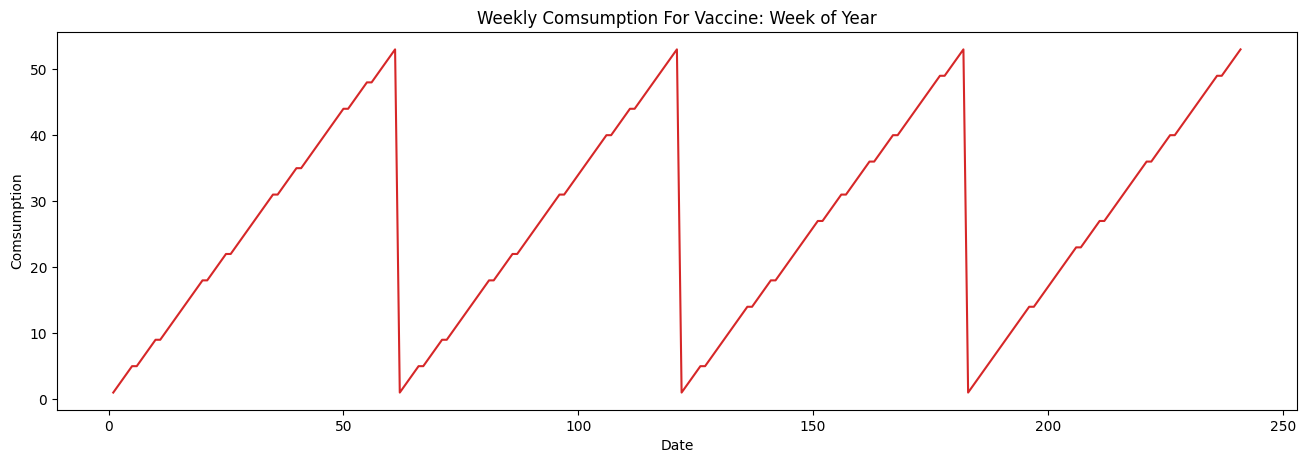

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21560 missing from current font.
  font.set_

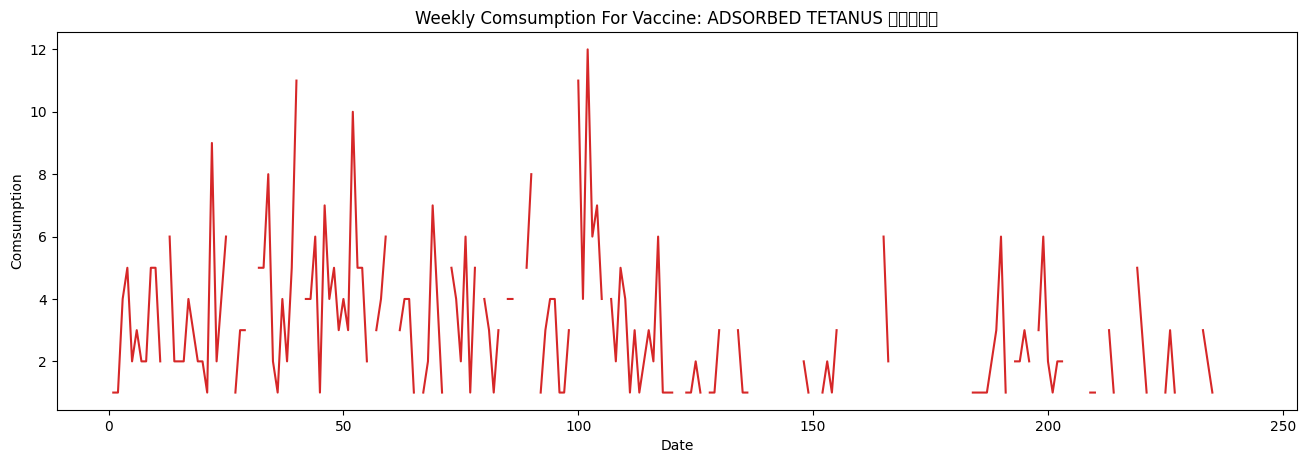

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20260 missing from current font.
  font.set_

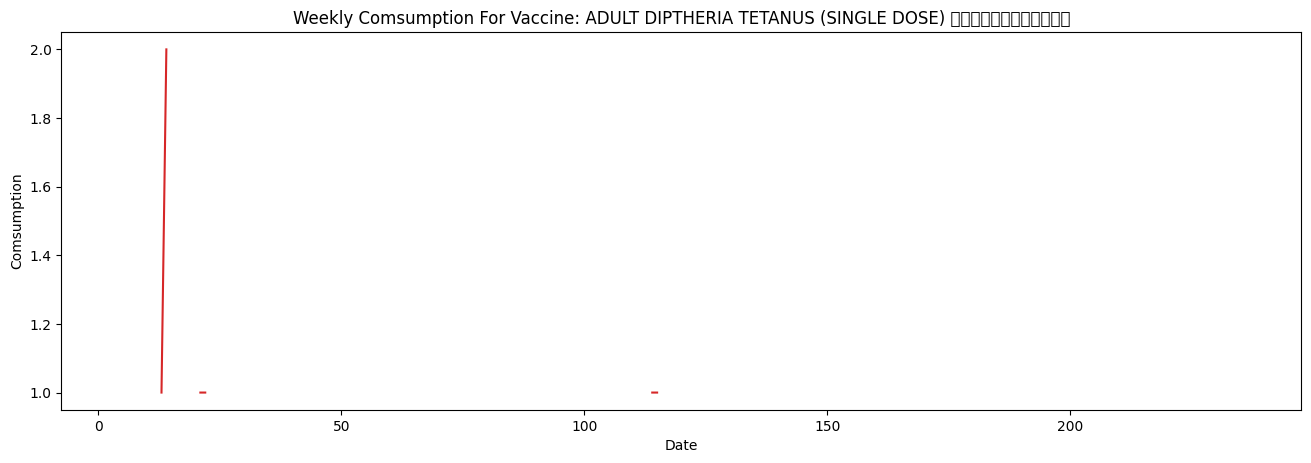

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21058 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30168 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21058 missing from current font.
  font.set_text

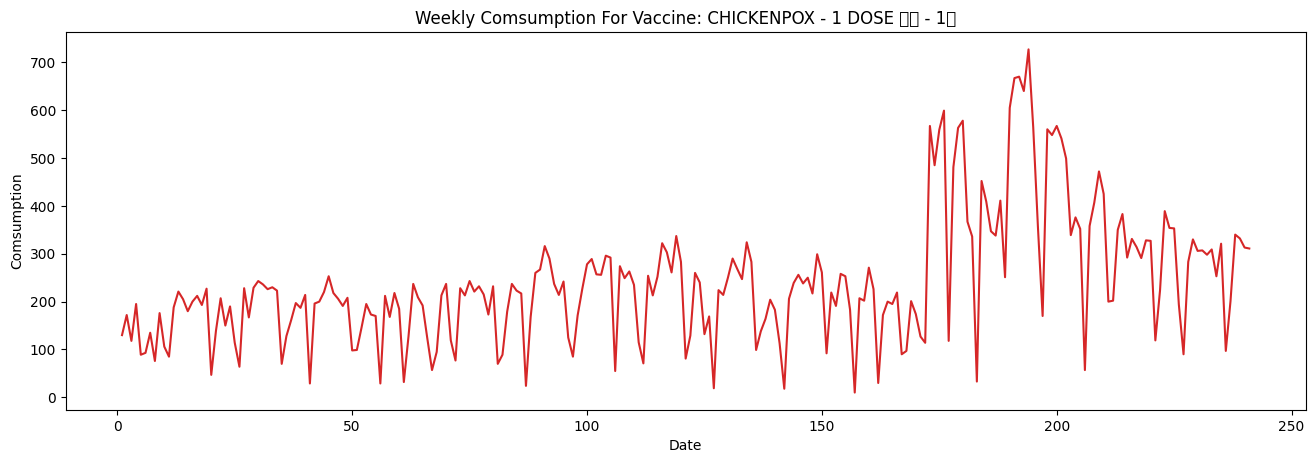

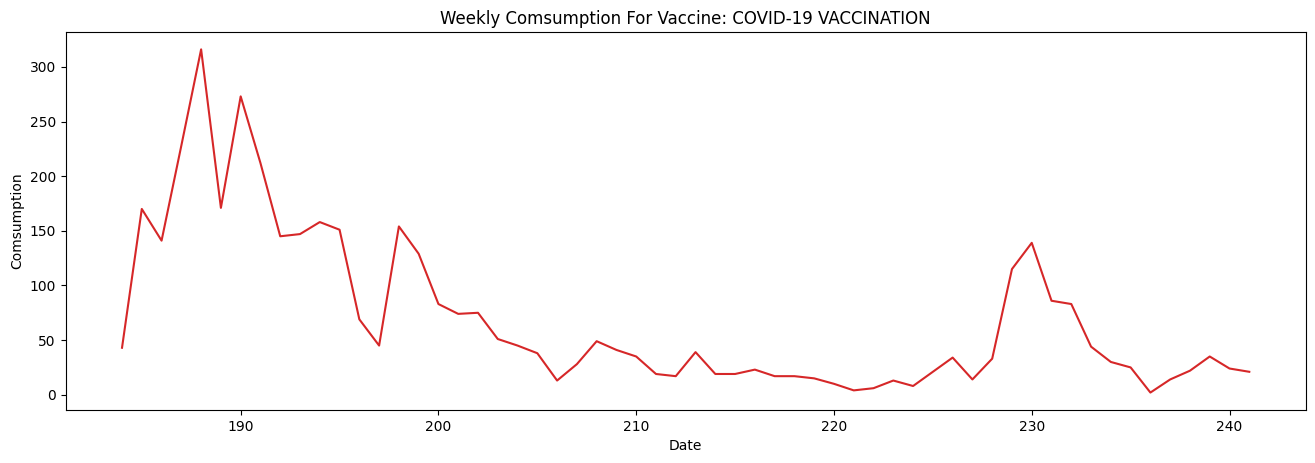

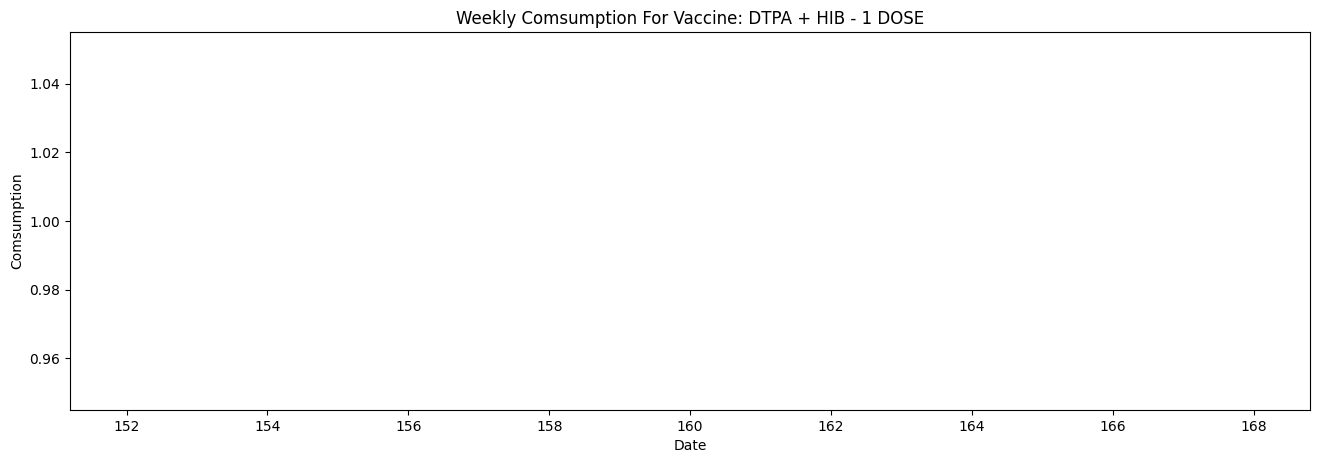

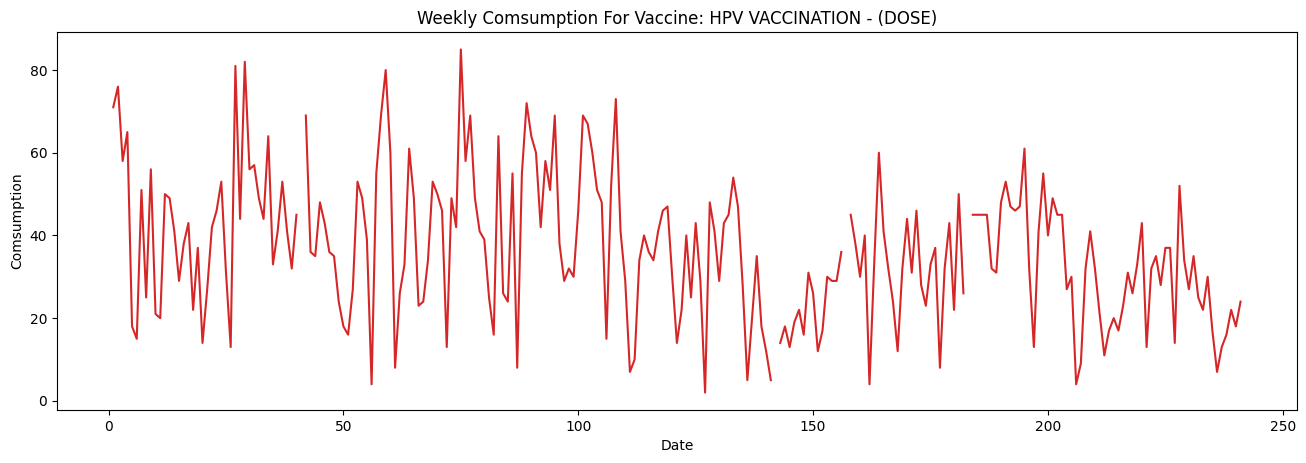

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32925 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_

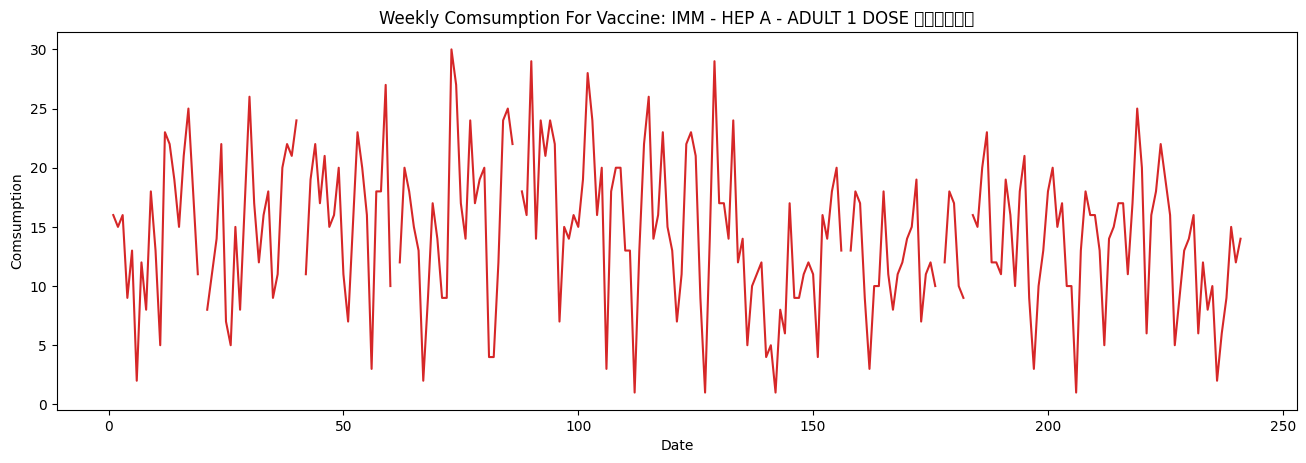

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32925 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_

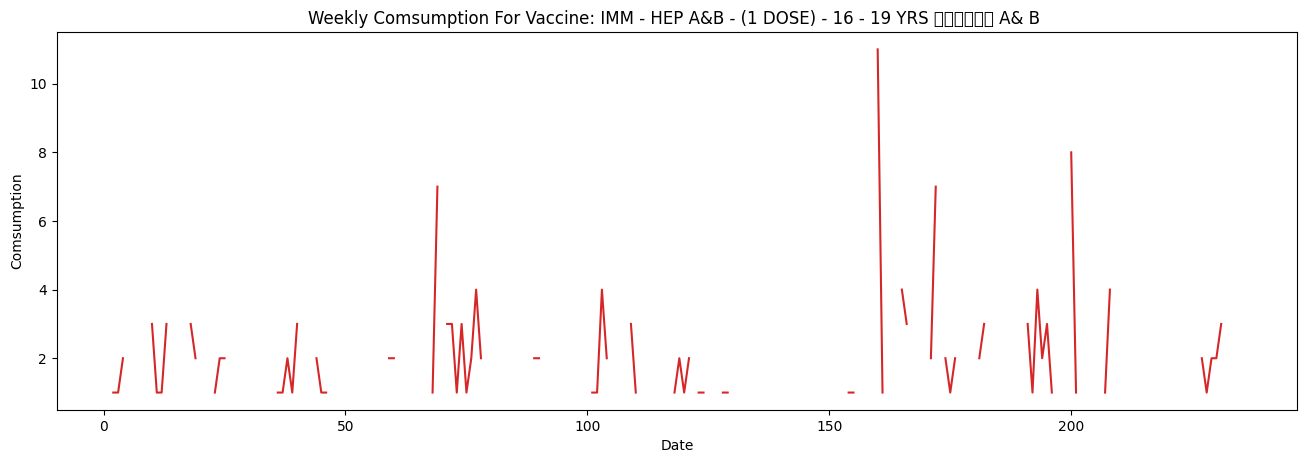

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32925 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_

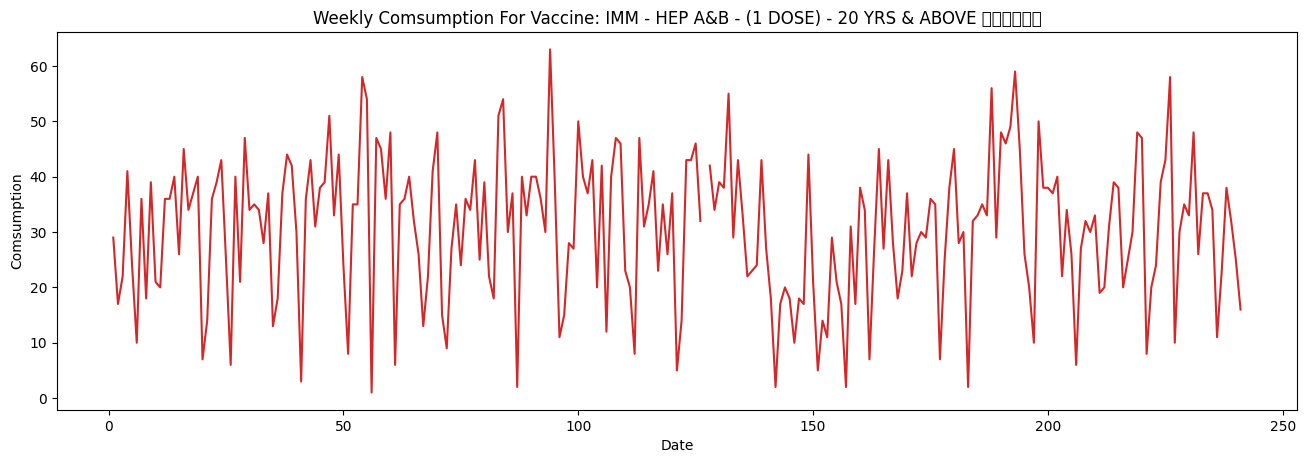

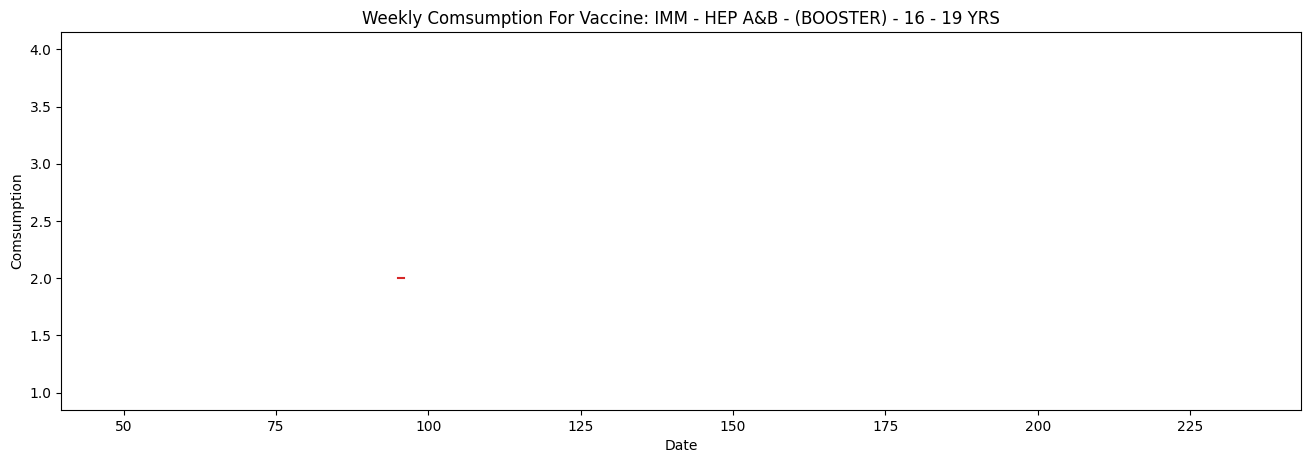

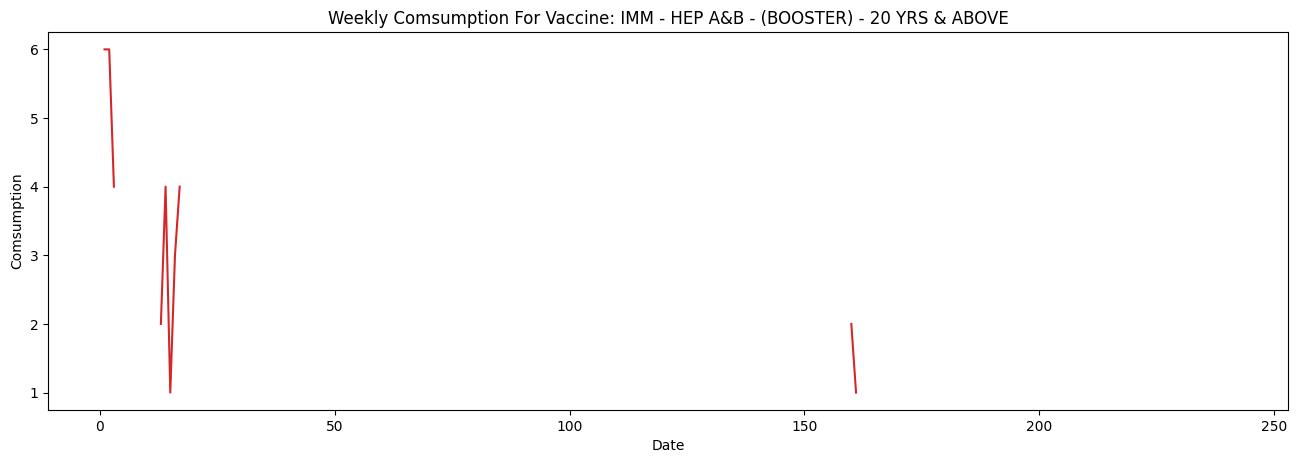

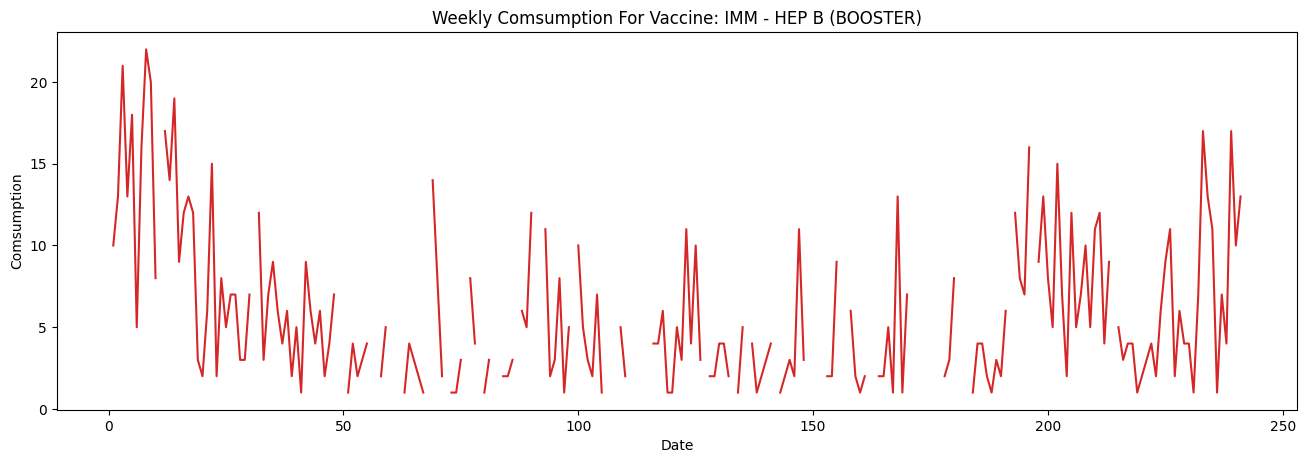

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32925 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_

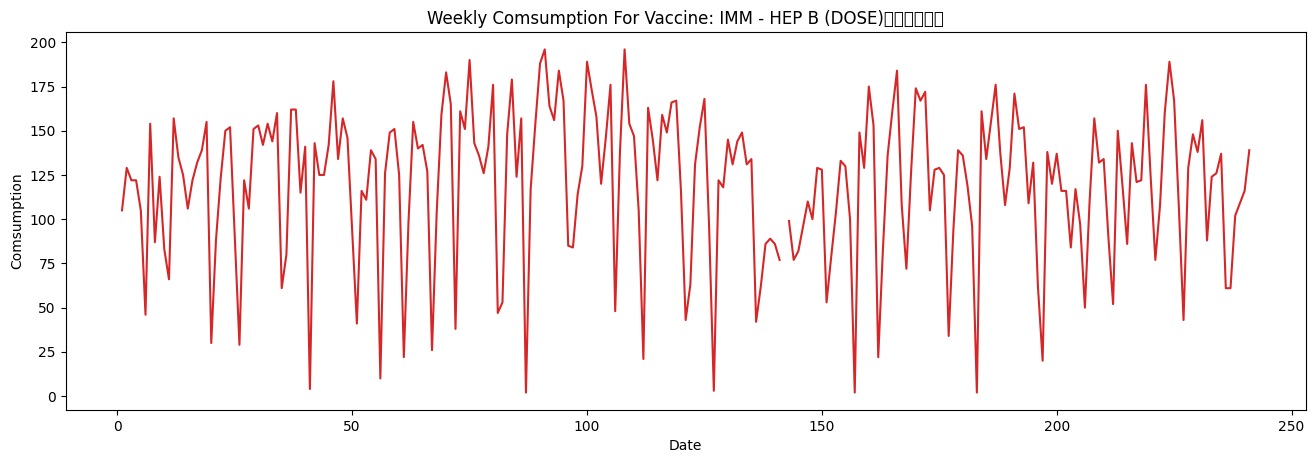

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32954 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29699 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32954 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_te

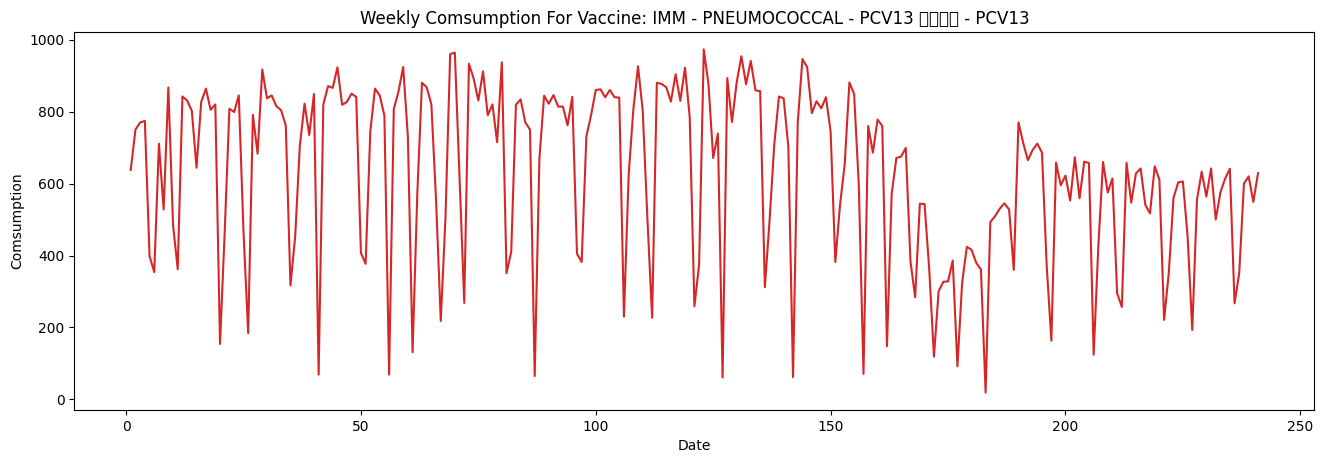

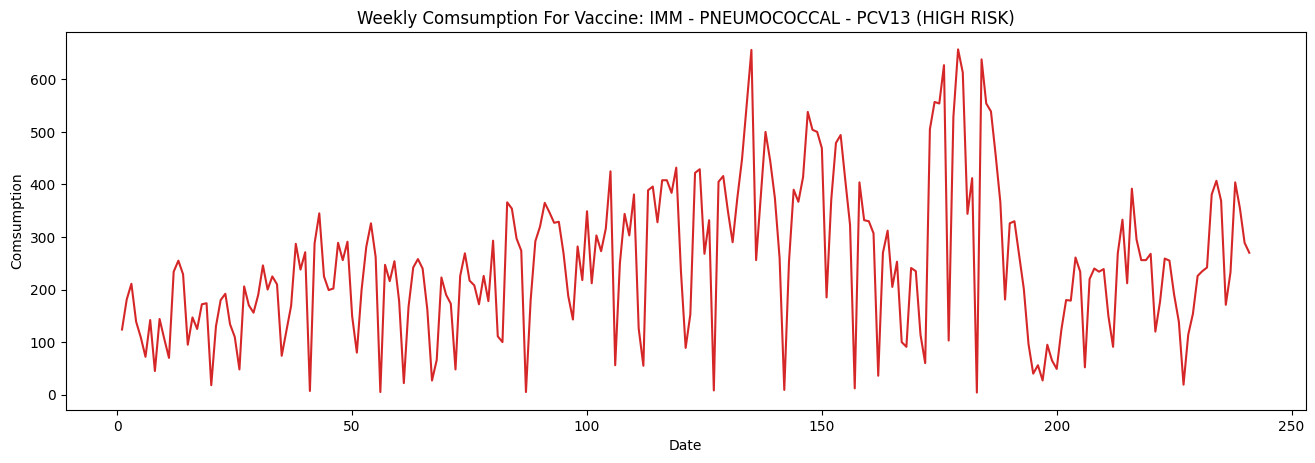

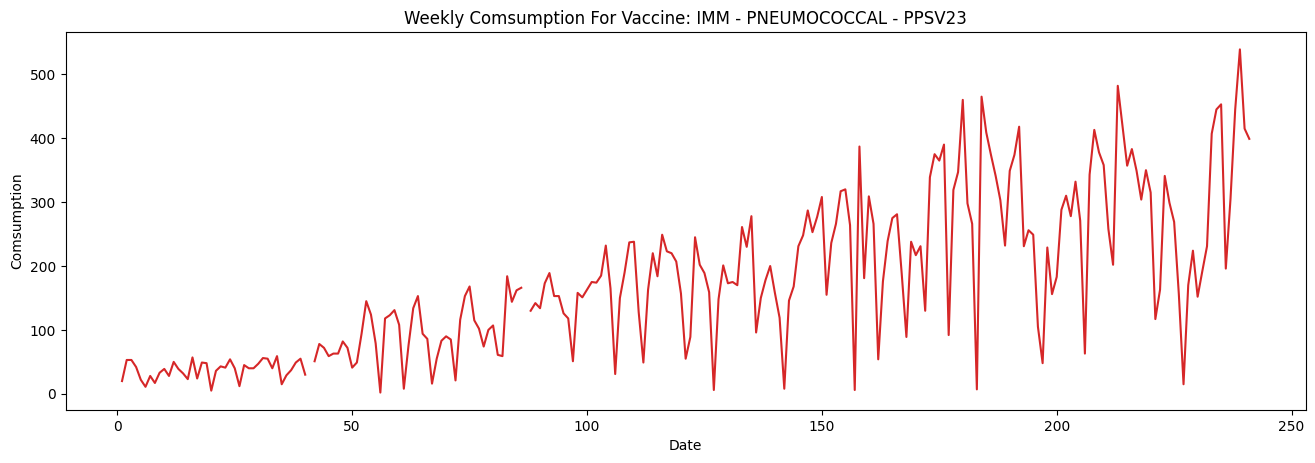

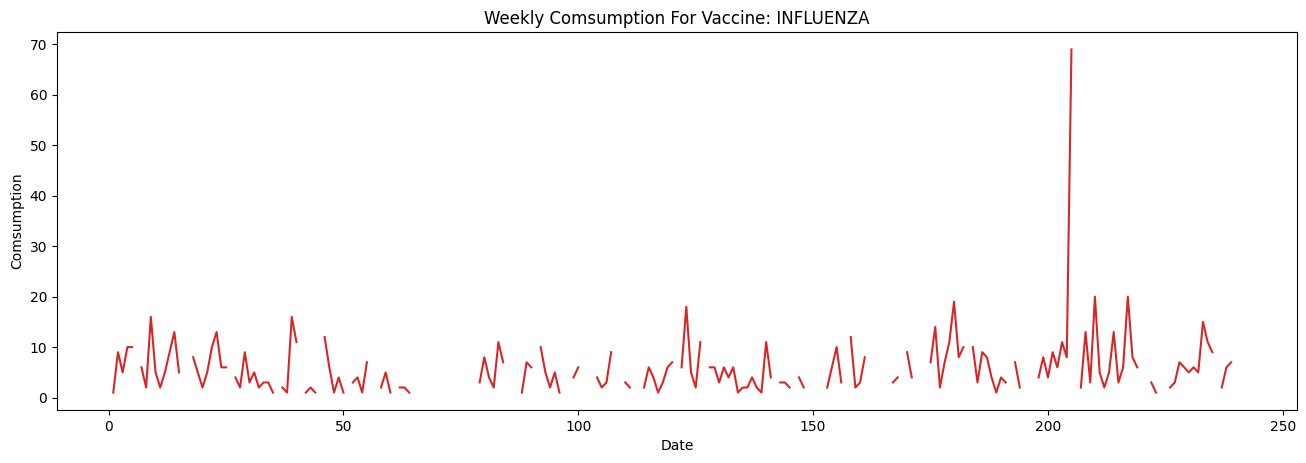

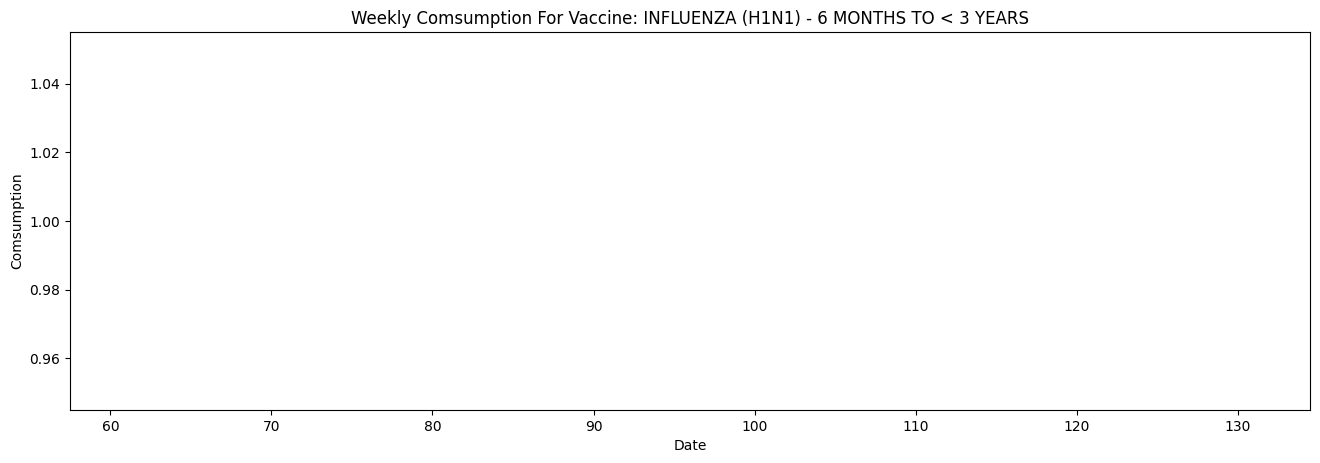

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_

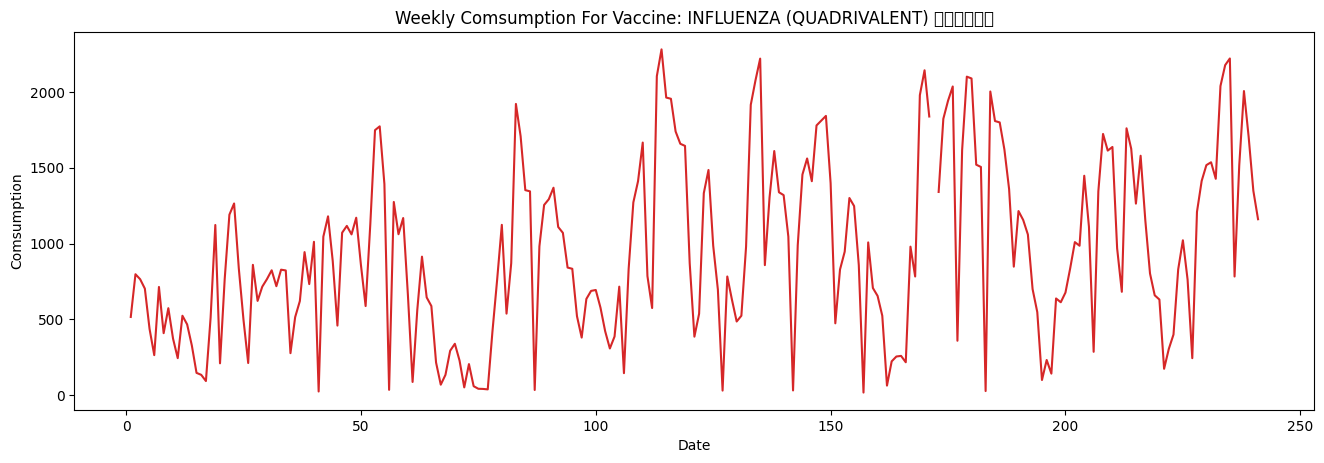

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29699 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_

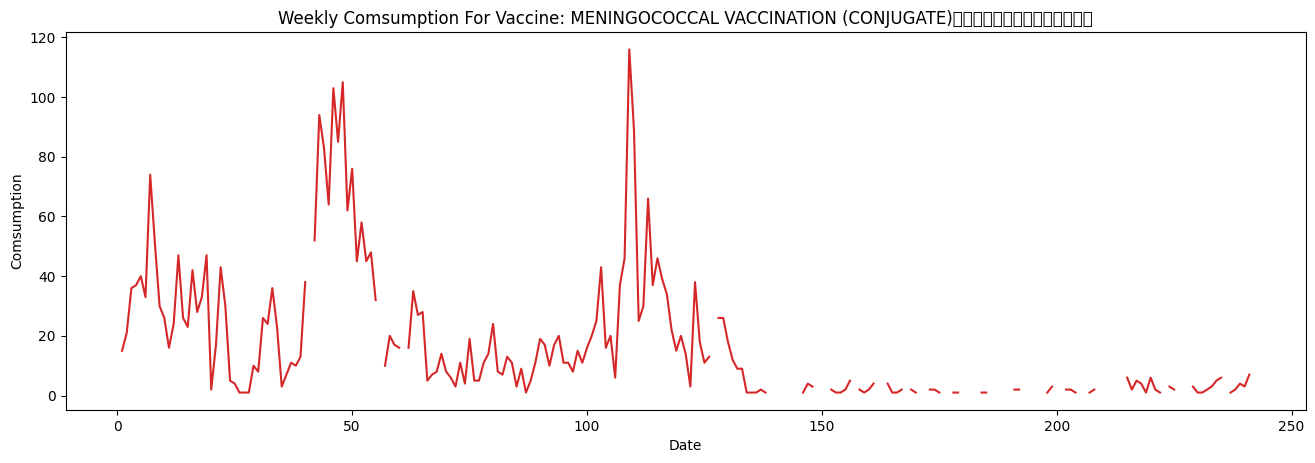

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29699 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33740 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_

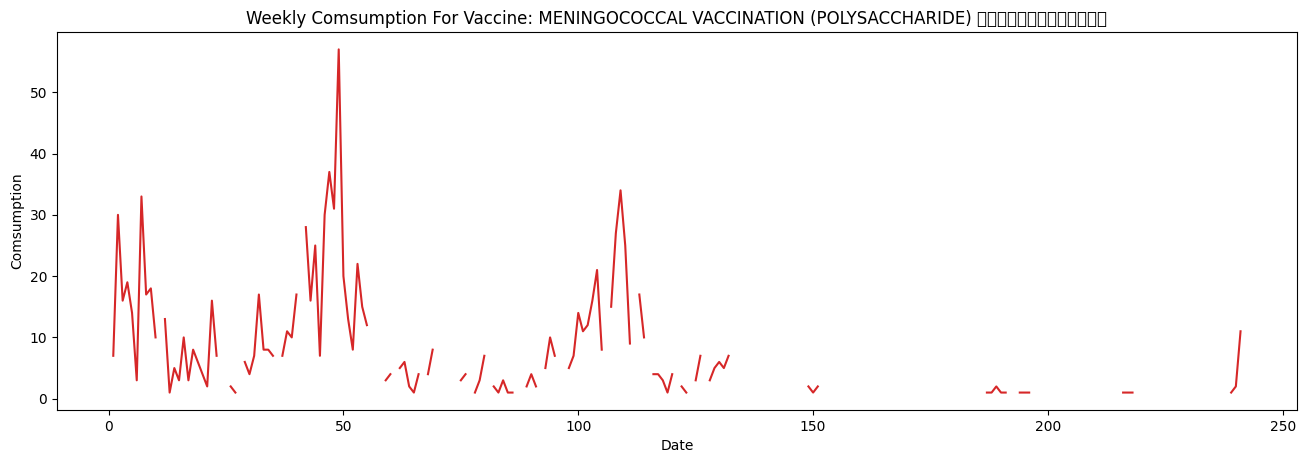

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_

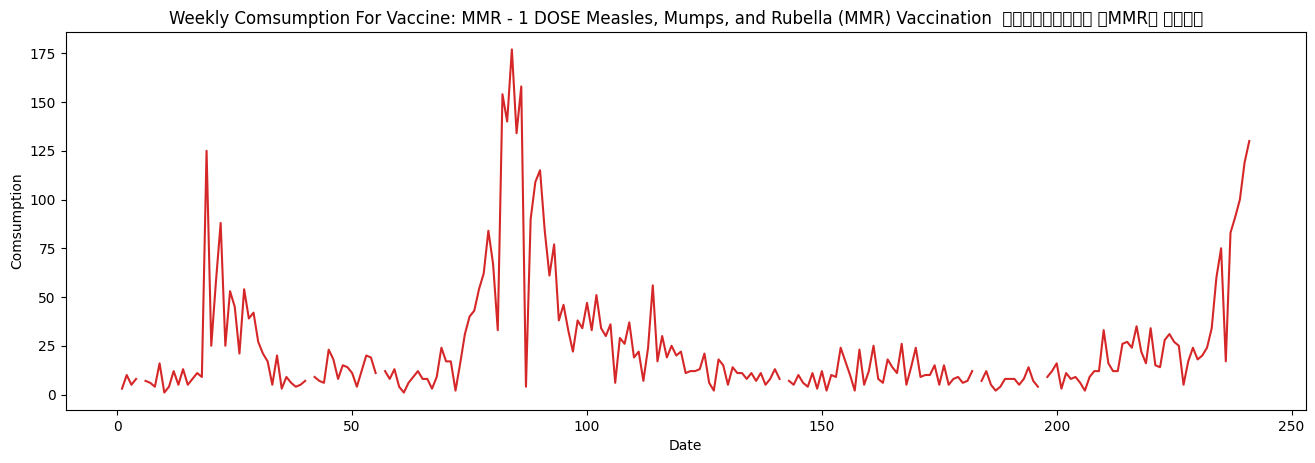

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36136 missing from current font.
  font.set_

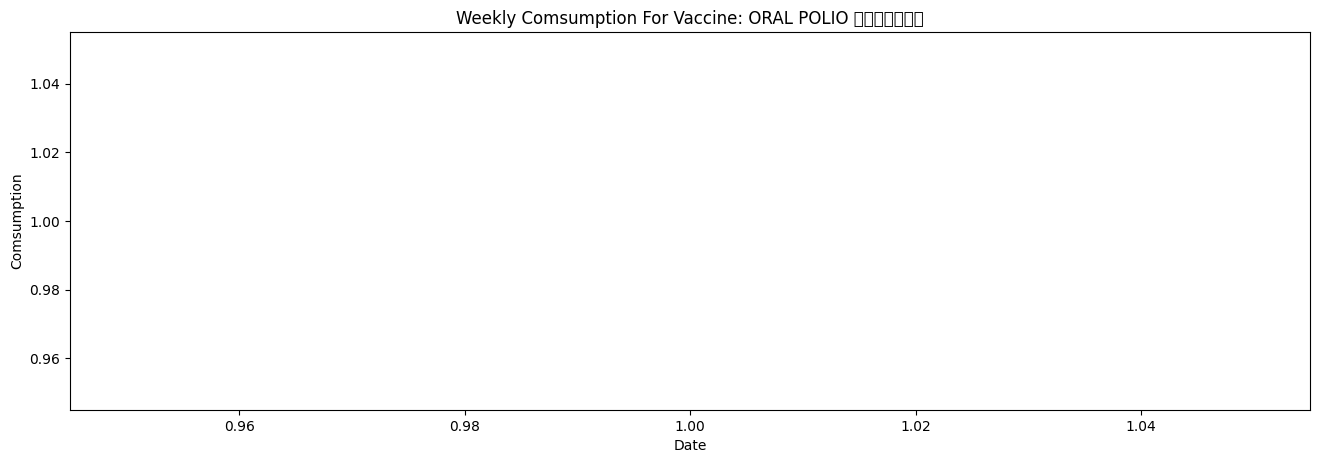

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27602 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_

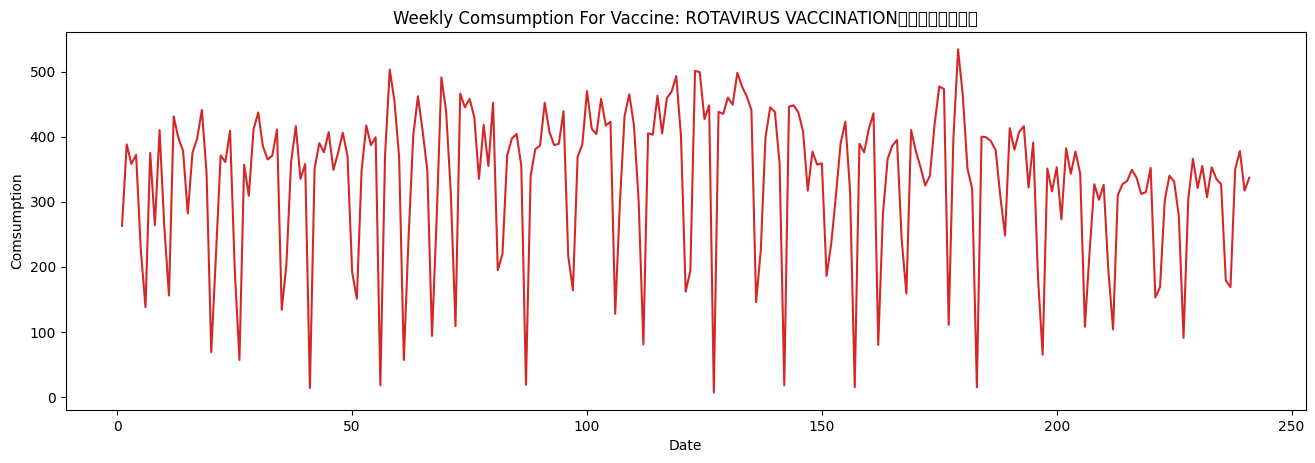

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31181 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_

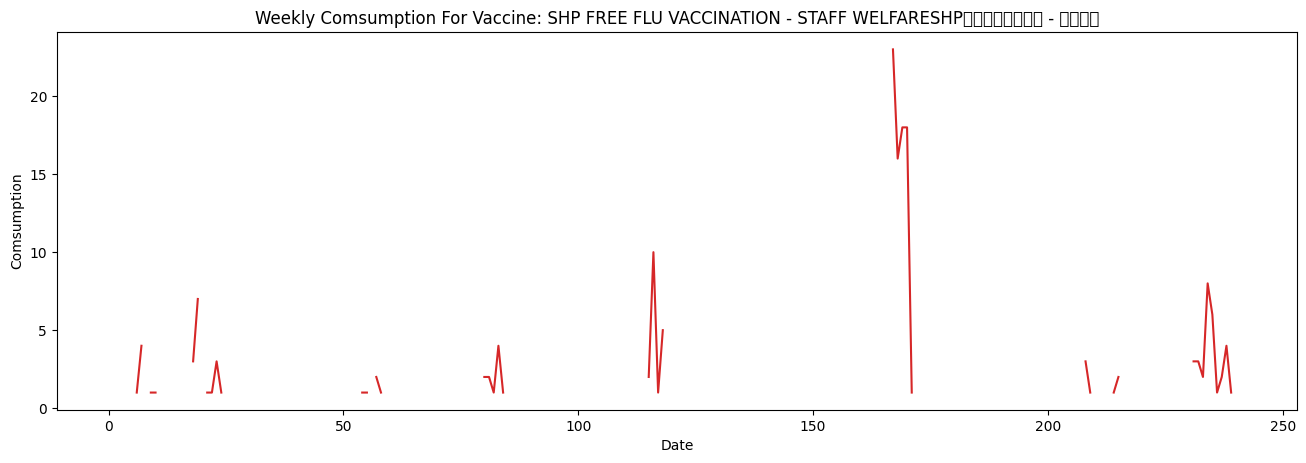

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39118 missing from current font.
  font.set_

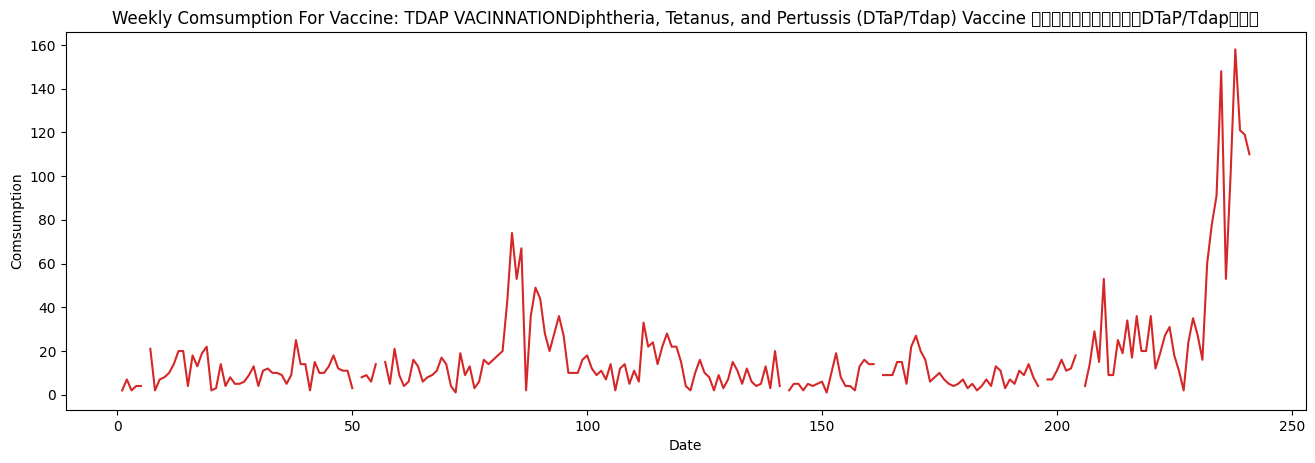

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_

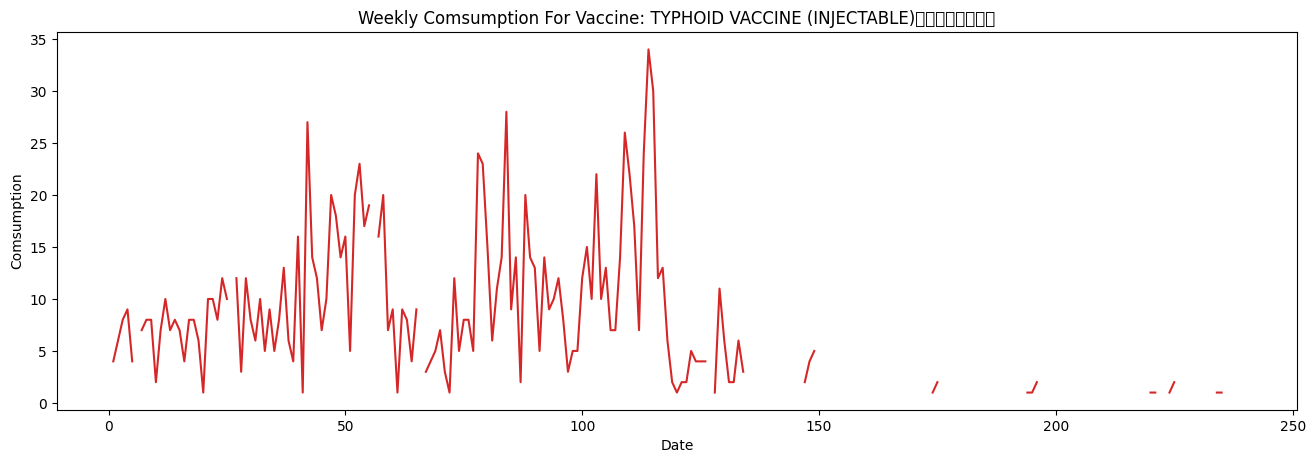

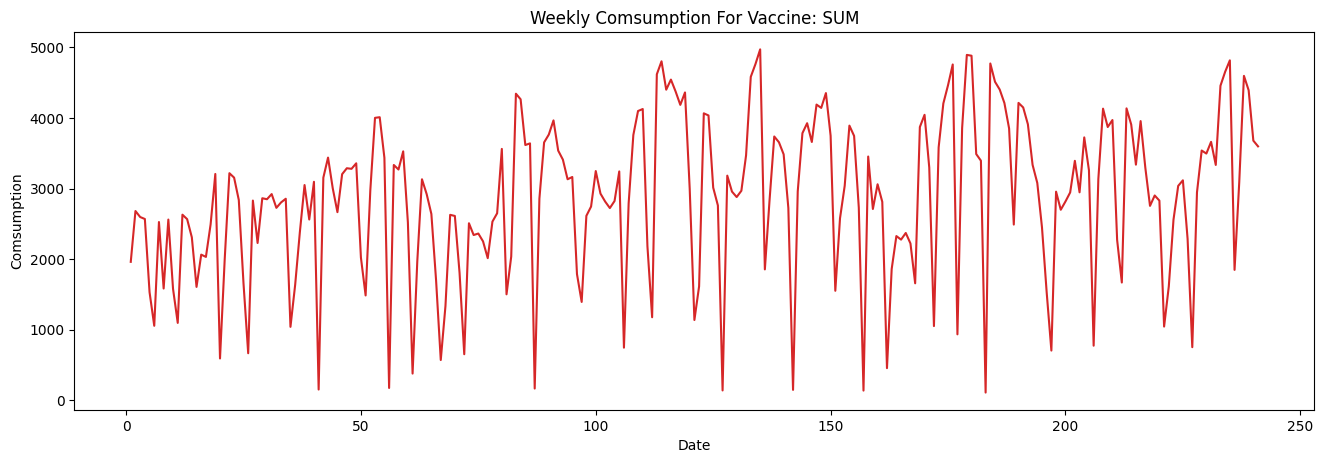

TypeError: ignored

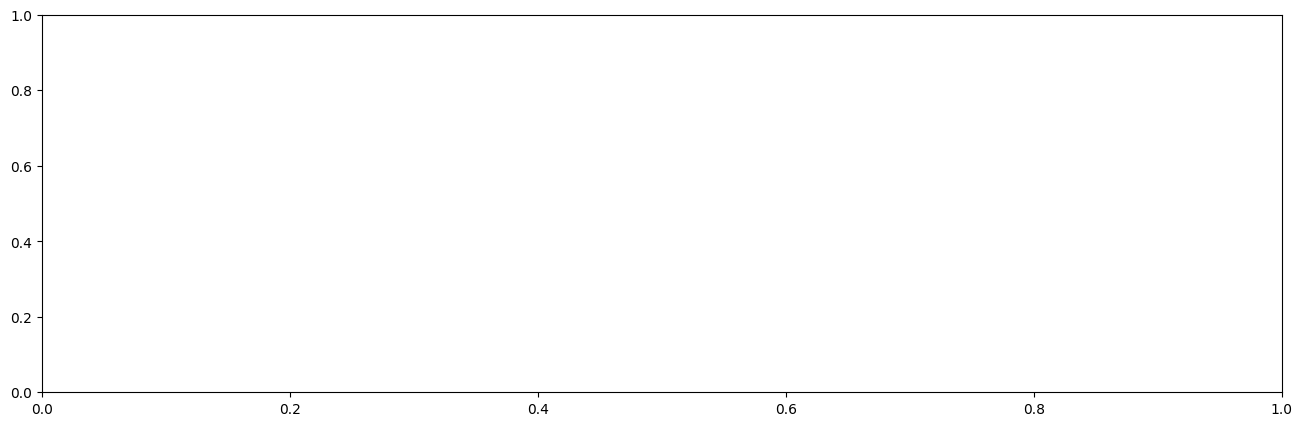

In [ ]:
#plot weekly time series 
def plot_df(dfw, x, y, title="", xlabel='Date', ylabel='Comsumption', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
for i in range(len(vaccine_weekly_list)):
  plot_df(dfw, x=dfw['index'], y=dfw[vaccine_weekly_list[i]], title='Weekly Comsumption For Vaccine: '+ vaccine_weekly_list[i])

In [ ]:
# Check Stationarity of a Time Series


two reason causing not stationarity
- Trend: varying mean over time.
- seasonality:  variations at specific time-frames. 


Estimating & Eliminating Trend:

- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

Eliminating Trend and Seasonality:
- Differencing – taking the differece with a particular time lag
- Decomposition – modeling both trend and seasonality and removing them from the model.


Apply Model: ARIMA


evaluate model: 

Mean absolute error: MAE

Root mean squared error: RMSE

